In [1]:
%load_ext autotime

time: 593 µs (started: 2021-06-23 11:12:33 +00:00)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import arviz as az

import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

time: 40.1 s (started: 2021-06-23 11:12:33 +00:00)


## Read files

In [3]:
path = "/home/ubuntu/kmexis/fotini/inputs.xlsx"
inputs = pd.read_excel(path)
inputs

ALL_E_1   ALL_E_2   ALL_LCOL  ALL_Q_MAX  ALL_Q_SENS_1  ALL_Q_SENS_2  \
0      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
1      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
2      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
3      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
4      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
...         ...       ...        ...        ...           ...           ...   
14658  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14659  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14660  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14661  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14662  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   

       ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  ...  \
0            0.563438    8.543496e-02    1.717066e-02    6.322206e-07  ...   
1            0.564451    8.466281e-02    2.905807e-02    1.612620e-06  ...   
2            0.566313    7.832914e-02    4.802137e-02    4.036888e-06  ...   
3            0.571410    6.752206e-02    7.818277e-02    1.006441e-05  ...   
4            0.581038    5.349233e-02    1.279746e-01    2.608407e-05  ...   
...               ...             ...             ...             ...  ...   
14658        0.422856    6.487419e-09    1.306235e-15    6.395148e-14  ...   
14659        0.424128    1.190282e-08    1.238555e-15    6.192088e-14  ...   
14660        0.425468    2.186053e-08    1.171234e-15    5.985949e-14  ...   
14661        0.426815    4.017112e-08    1.104526e-15    5.777195e-14  ...   
14662        0.428164    7.382999e-08    1.038707e-15    5.566414e-14  ...   

       ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  ALL_SPC_1_1_1  ALL_SPC_1_2_1  \
0        3.267351e-06    5.097847e-03       0.563424   8.529911e-02   
1        7.447066e-07    2.227611e-03       0.564439   8.480581e-02   
2        4.323652e-08    3.645484e-04       0.566283   7.868749e-02   
3        1.249398e-09    5.785877e-07       0.571336   6.804240e-02   
4        1.362521e-08    1.603492e-10       0.580926   5.412120e-02   
...               ...             ...            ...            ...   
14658    4.803168e-02    2.144490e-04       0.422844   6.327573e-09   
14659    8.602525e-02    5.536509e-04       0.424114   1.160900e-08   
14660    1.373932e-01    1.272117e-03       0.425454   2.132021e-08   
14661    1.981678e-01    2.642789e-03       0.426801   3.917766e-08   
14662    2.597403e-01    4.988145e-03       0.428151   7.200418e-08   

       ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  ALL_SPC_2_2_1  \
0       1.664498e-02   5.988277e-07       0.687950   2.880853e-23   
1       2.844474e-02   1.552307e-06       0.707030   1.396225e-21   
2       4.705688e-02   3.889567e-06       0.910255   1.053715e-11   
3       7.662721e-02   9.690975e-06       1.467872   3.509466e-08   
4       1.253729e-01   2.506206e-05       1.891948   6.335367e-07   
...              ...            ...            ...            ...   
14658   1.309060e-15   6.403537e-14       0.602009   1.006856e-01   
14659   1.241369e-15   6.200610e-14       0.605812   5.134115e-02   
14660   1.174029e-15   5.994592e-14       0.608941   2.344860e-02   
14661   1.107290e-15   5.785936e-14       0.611419   9.704472e-03   
14662   1.041429e-15   5.575228e-14       0.613521   3.671428e-03   

       ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0       3.467715e-06   5.264804e-03  
1       7.997385e-07   2.318216e-03  
2       5.372676e-08   4.240466e-04  
3       1.085604e-09   8.770652e-07  
4       1.284046e-08   2.375659e-10  
...              ...            ...  
14658   4.732883e-02   2.096068e-04  
14659   8.418414e-02   5.339192e-04  
14660   1.350270e-01   1.231820e-03  
14661   1.955508e-01   2.569345e-03  
14662   2.572876e-01  

time: 1min 1s (started: 2021-06-23 11:13:13 +00:00)


In [4]:
X = inputs[['ALL_SPCE_1_1_1','ALL_SPCE_1_2_1','ALL_SPCE_1_3_1','ALL_SPCE_1_4_1',
      'ALL_SPCE_2_1_1','ALL_SPCE_2_2_1','ALL_SPCE_2_3_1','ALL_SPCE_2_4_1']]
X.head()

ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  \
0        0.563438        0.085435        0.017171    6.322206e-07   
1        0.564451        0.084663        0.029058    1.612620e-06   
2        0.566313        0.078329        0.048021    4.036888e-06   
3        0.571410        0.067522        0.078183    1.006441e-05   
4        0.581038        0.053492        0.127975    2.608407e-05   

   ALL_SPCE_2_1_1  ALL_SPCE_2_2_1  ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  
0        0.687977    2.510892e-23    3.267351e-06    5.097847e-03  
1        0.707637    3.310449e-21    7.447066e-07    2.227611e-03  
2        0.914227    1.645853e-11    4.323652e-08    3.645484e-04  
3        1.474020    4.163026e-08    1.249398e-09    5.785877e-07  
4        1.893482    6.809961e-07    1.362521e-08    1.603492e-10

time: 132 ms (started: 2021-06-23 11:14:15 +00:00)


In [5]:
y = inputs[['ALL_SPC_1_1_1','ALL_SPC_1_2_1','ALL_SPC_1_3_1','ALL_SPC_1_4_1',
            'ALL_SPC_2_1_1','ALL_SPC_2_2_1','ALL_SPC_2_3_1','ALL_SPC_2_4_1']]
y.head()

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  \
0       0.563424       0.085299       0.016645   5.988277e-07       0.687950   
1       0.564439       0.084806       0.028445   1.552307e-06       0.707030   
2       0.566283       0.078687       0.047057   3.889567e-06       0.910255   
3       0.571336       0.068042       0.076627   9.690975e-06       1.467872   
4       0.580926       0.054121       0.125373   2.506206e-05       1.891948   

   ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0   2.880853e-23   3.467715e-06   5.264804e-03  
1   1.396225e-21   7.997385e-07   2.318216e-03  
2   1.053715e-11   5.372676e-08   4.240466e-04  
3   3.509466e-08   1.085604e-09   8.770652e-07  
4   6.335367e-07   1.284046e-08   2.375659e-10

time: 248 ms (started: 2021-06-23 11:14:15 +00:00)


# Taking a look at data 

In [6]:
X.describe()

ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  \
count    14663.000000    1.466300e+04    1.466300e+04    1.466300e+04   
mean         0.635476    3.005268e-02    1.831368e-01    2.013413e-02   
std          0.288546    9.894182e-02    4.953198e-01    6.064496e-02   
min          0.244421  -1.000000e-300  -1.000000e-300  -1.000000e-300   
25%          0.493538    8.211038e-11    2.200535e-11    7.446550e-13   
50%          0.586623    1.435335e-05    3.656299e-05    3.111641e-07   
75%          0.688346    1.219501e-02    9.306647e-02    9.138178e-03   
max          2.324910    1.753896e+00    7.538110e+00    8.256351e-01   

       ALL_SPCE_2_1_1  ALL_SPCE_2_2_1  ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  
count    14663.000000    1.466300e+04    1.466300e+04    1.466300e+04  
mean         0.636598    3.012237e-02    1.852281e-01    2.042035e-02  
std          0.289368    1.006641e-01    5.073499e-01    6.212573e-02  
min          0.244433  -1.000000e-300  -1.000000e-300  -1.000000e-300  
25%          0.494594    7.373166e-11    2.179450e-11    7.559760e-13  
50%          0.587518    1.358132e-05    3.639787e-05    3.274161e-07  
75%          0.688899    1.201865e-02    9.321074e-02    9.146568e-03  
max          2.324899    1.782715e+00    7.845835e+00    8.373920e-01

time: 419 ms (started: 2021-06-23 11:14:15 +00:00)


In [7]:
y.describe()

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  \
count   14663.000000   1.466300e+04   1.466300e+04   1.466300e+04   
mean        0.635477   3.004627e-02   1.831234e-01   2.012738e-02   
std         0.288544   9.888382e-02   4.952544e-01   6.063838e-02   
min         0.244425 -1.000000e-300 -1.000000e-300 -1.000000e-300   
25%         0.493400   8.340739e-11   2.455481e-11   7.717221e-13   
50%         0.586660   1.428482e-05   3.483515e-05   3.168238e-07   
75%         0.688318   1.201870e-02   9.279388e-02   8.939414e-03   
max         2.318533   1.752356e+00   7.549309e+00   8.258429e-01   

       ALL_SPC_2_1_1  ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
count   14663.000000   1.466300e+04   1.466300e+04   1.466300e+04  
mean        0.636595   3.011944e-02   1.852237e-01   2.041332e-02  
std         0.289359   1.006278e-01   5.072905e-01   6.211885e-02  
min         0.244437 -1.000000e-300 -1.000000e-300 -1.000000e-300  
25%         0.494531   7.378653e-11   2.420378e-11   7.731599e-13  
50%         0.587667   1.346272e-05   3.482898e-05   3.288474e-07  
75%         0.688888   1.188308e-02   9.285689e-02   8.966112e-03  
max         2.318523   1.781309e+00   7.866252e+00   8.376062e-01

time: 1.31 s (started: 2021-06-23 11:14:16 +00:00)


# Preprocessing 

In [8]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42, shuffle=True)

time: 91.9 ms (started: 2021-06-23 11:14:17 +00:00)


In [9]:
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0.1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print((X_train_scaled.shape, y_train.shape))

print((X_test_scaled.shape, y_test.shape))

((11730, 8), (11730, 8))
((2933, 8), (2933, 8))
time: 267 ms (started: 2021-06-23 11:14:17 +00:00)


In [10]:
y_scaler = StandardScaler()
# y_scaler = MinMaxScaler(feature_range=(1000,1001))

y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.fit_transform(y_test)

print((X_train_scaled.shape, y_train_scaled.shape))

print((X_test_scaled.shape, y_test.shape))

((11730, 8), (11730, 8))
((2933, 8), (2933, 8))
time: 412 ms (started: 2021-06-23 11:14:18 +00:00)


## ANN 

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25, input_dim=8, kernel_initializer='truncated_normal', activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='linear'))

model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse'])

time: 2.83 s (started: 2021-06-23 11:14:18 +00:00)


In [12]:
history = model.fit(X_train_scaled, y_train_scaled, validation_split=.2, 
                    verbose=10, epochs=100, batch_size=512)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

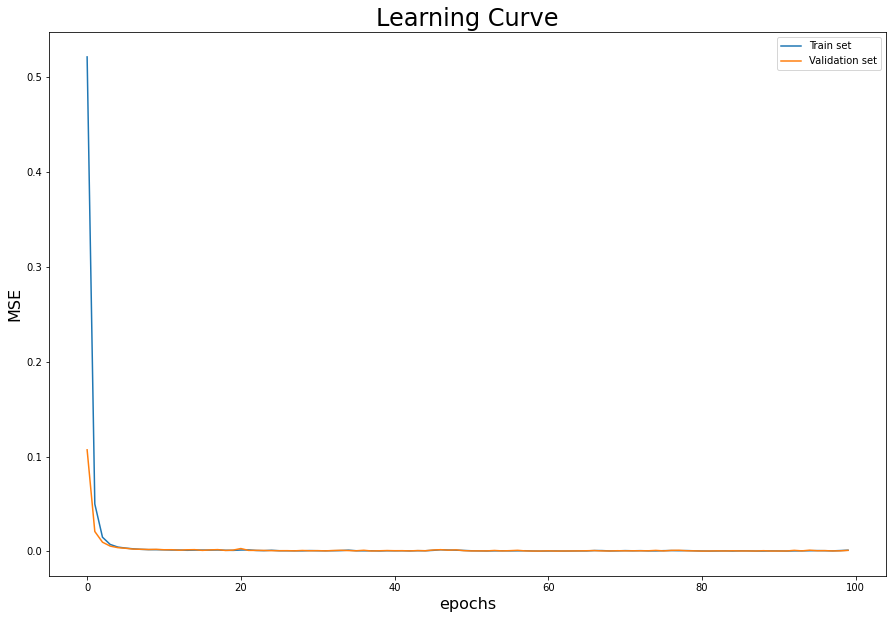

time: 2.57 s (started: 2021-06-23 11:17:20 +00:00)


In [13]:
# plot loss during training
plt.figure(figsize=(15,10))

plt.title('Learning Curve', fontsize=24)
plt.plot(history.history['loss'], label='Train set')
plt.plot(history.history['val_loss'], label='Validation set')
plt.legend()
plt.ylabel('MSE', fontsize=16)
plt.xlabel('epochs', fontsize=16)
plt.show()

In [14]:
# newX = asarray([row])
yhat = model.predict(X_test_scaled)
yhat = y_scaler.inverse_transform(yhat)

time: 3.16 s (started: 2021-06-23 11:17:22 +00:00)


In [15]:
yhat = pd.DataFrame(yhat)

yhat[yhat<0.0009]=0
yhat

0         1         2         3         4         5         6  \
0     0.503250  0.199214  0.005279  0.000000  2.031773  0.002279  0.000000   
1     0.600208  0.112247  0.001572  0.000000  0.496404  0.001516  0.006934   
2     0.778988  0.000000  0.000000  0.000000  0.494923  0.014293  0.226413   
3     0.653700  0.000000  0.000000  0.000000  0.567139  0.002184  0.780452   
4     0.402417  0.002428  0.000000  0.000000  0.522496  0.001088  0.009768   
...        ...       ...       ...       ...       ...       ...       ...   
2928  0.580070  0.024326  0.000000  0.000956  0.376720  0.002090  0.006318   
2929  0.530017  0.001789  0.000000  0.000000  0.759459  0.002532  0.000000   
2930  0.514376  0.194293  0.000000  0.000000  1.198470  0.002885  0.005496   
2931  0.744697  0.000000  0.000000  0.009462  0.383693  0.001257  0.431321   
2932  0.631517  0.000000  0.000000  0.000000  0.557018  0.001950  0.164037   

             7  
0     0.000000  
1     0.000000  
2     0.056410  
3     0.135969  
4     0.000000  
...        ...  
2928  0.000000  
2929  0.000000  
2930  0.000000  
2931  0.046553  
2932  0.000000  

[2933 rows x 8 columns]

time: 422 ms (started: 2021-06-23 11:17:26 +00:00)


In [16]:
y_test.reset_index(inplace=True)
y_test = y_test.drop('index',axis=1)
y_test

ALL_SPC_1_1_1  ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  \
0          0.527259   1.965165e-01   2.752861e-03   1.934003e-07   
1          0.605870   1.101945e-01   8.757808e-03   2.294124e-05   
2          0.786287   1.019956e-41   3.627868e-20   1.556201e-14   
3          0.662410   1.625902e-44   4.828204e-17   1.624920e-11   
4          0.401719   7.701362e-13   3.616175e-15   7.209781e-14   
...             ...            ...            ...            ...   
2928       0.582903   2.373038e-02   4.748183e-08   5.220252e-12   
2929       0.538234   1.095103e-05   1.416151e-13   1.959040e-13   
2930       0.531297   1.897730e-01   3.434456e-06   6.441967e-10   
2931       0.746370   1.077359e-12   9.452048e-04   1.022693e-02   
2932       0.637765   2.817759e-25   3.321760e-07   9.770052e-05   

      ALL_SPC_2_1_1  ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0          2.050439   1.268962e-13   1.197662e-16   5.749854e-14  
1          0.499898   3.804150e-07   4.136566e-10   9.890469e-09  
2          0.492356   1.188206e-02   2.151973e-01   5.925311e-02  
3          0.566758   1.055895e-03   7.535986e-01   1.404780e-01  
4          0.516120   1.654129e-04   1.818720e-11   1.214056e-14  
...             ...            ...            ...            ...  
2928       0.380430   6.850563e-18   4.819624e-19   1.733485e-17  
2929       0.766286   1.223970e-14   9.968641e-14   8.009662e-13  
2930       1.208434   4.800791e-07   1.397447e-16   3.190147e-16  
2931       0.380313   5.443596e-04   4.185582e-01   4.954949e-02  
2932       0.559658   1.740395e-03   1.584525e-01   1.508751e-03  

[2933 rows x 8 columns]

time: 691 ms (started: 2021-06-23 11:17:26 +00:00)


In [17]:
yhat.max(0)

0    2.290521
1    1.698781
2    4.734897
3    0.798650
4    2.293507
5    1.615495
6    6.305636
7    0.766421
dtype: float32

time: 64.2 ms (started: 2021-06-23 11:17:27 +00:00)


In [18]:
y_test.max(0)

ALL_SPC_1_1_1    2.318501
ALL_SPC_1_2_1    1.679731
ALL_SPC_1_3_1    4.808797
ALL_SPC_1_4_1    0.799316
ALL_SPC_2_1_1    2.318446
ALL_SPC_2_2_1    1.634228
ALL_SPC_2_3_1    6.344785
ALL_SPC_2_4_1    0.780955
dtype: float64

time: 102 ms (started: 2021-06-23 11:17:27 +00:00)


In [19]:
results = {'ALL_SPC_1_1_1': mean_absolute_error(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': mean_absolute_error(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': mean_absolute_error(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": mean_absolute_error(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': mean_absolute_error(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': mean_absolute_error(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': mean_absolute_error(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': mean_absolute_error(y_test['ALL_SPC_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.009557508804121248,
 'ALL_SPC_1_2_1': 0.001932187039298798,
 'ALL_SPC_1_3_1': 0.00500944720589283,
 'ALL_SPC_1_4_1': 0.0003840673711438294,
 'ALL_SPC_2_1_1': 0.003987625534043648,
 'ALL_SPC_2_2_1': 0.001749359756624676,
 'ALL_SPC_2_3_1': 0.005955183320725942,
 'ALL_SPC_2_4_1': 0.0011105853613639868}

time: 186 ms (started: 2021-06-23 11:17:27 +00:00)


In [20]:
results = {'ALL_SPC_1_1_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_1_1'], yhat[0])),
        'ALL_SPC_1_2_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_2_1'], yhat[1])),
        'ALL_SPC_1_3_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_1_3_1'], yhat[2])),
        "ALL_SPC_1_4_1": np.sqrt(mean_squared_error(y_test['ALL_SPC_1_4_1'], yhat[3])),
        'ALL_SPC_2_1_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_1_1'], yhat[4])),
        'ALL_SPC_2_2_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_2_1'], yhat[5])),
        'ALL_SPC_2_3_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_3_1'], yhat[6])),
        'ALL_SPC_2_4_1': np.sqrt(mean_squared_error(y_test['ALL_SPC_2_4_1'], yhat[7]))}
results

{'ALL_SPC_1_1_1': 0.015187209863327526,
 'ALL_SPC_1_2_1': 0.002639992400025572,
 'ALL_SPC_1_3_1': 0.009969146168313282,
 'ALL_SPC_1_4_1': 0.0009023861227669827,
 'ALL_SPC_2_1_1': 0.005820587838063776,
 'ALL_SPC_2_2_1': 0.0025931481454099354,
 'ALL_SPC_2_3_1': 0.008809900901020632,
 'ALL_SPC_2_4_1': 0.0021391680413503774}

time: 80.9 ms (started: 2021-06-23 11:17:28 +00:00)


In [21]:
def error(true, pred):
    return np.mean(np.abs((true-pred)/true))

time: 718 µs (started: 2021-06-23 11:17:28 +00:00)


In [22]:
results = {'ALL_SPC_1_1_1': error(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': error(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': error(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": error(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': error(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': error(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': error(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': error(y_test['ALL_SPC_2_4_1'], yhat[7])}
results

{'ALL_SPC_1_1_1': 0.018004586833995768,
 'ALL_SPC_1_2_1': 3.1505521382890933e+52,
 'ALL_SPC_1_3_1': 1.9147113176263775e+18,
 'ALL_SPC_1_4_1': 10325076278133.67,
 'ALL_SPC_2_1_1': 0.006727600535240085,
 'ALL_SPC_2_2_1': 2.6851971095769785e+52,
 'ALL_SPC_2_3_1': 2.2574973228138178e+20,
 'ALL_SPC_2_4_1': 370908038500513.3}

time: 139 ms (started: 2021-06-23 11:17:28 +00:00)


In [23]:
from sklearn.metrics import r2_score

results = {'ALL_SPC_1_1_1': r2_score(y_test['ALL_SPC_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': r2_score(y_test['ALL_SPC_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': r2_score(y_test['ALL_SPC_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": r2_score(y_test['ALL_SPC_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': r2_score(y_test['ALL_SPC_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': r2_score(y_test['ALL_SPC_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': r2_score(y_test['ALL_SPC_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': r2_score(y_test['ALL_SPC_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.9969845052925249,
 'ALL_SPC_1_2_1': 0.999350367801157,
 'ALL_SPC_1_3_1': 0.9994855930793769,
 'ALL_SPC_1_4_1': 0.9997992889851335,
 'ALL_SPC_2_1_1': 0.999587987574687,
 'ALL_SPC_2_2_1': 0.9993357803968659,
 'ALL_SPC_2_3_1': 0.9996737625914128,
 'ALL_SPC_2_4_1': 0.9987877796848708}

time: 244 ms (started: 2021-06-23 11:17:28 +00:00)


In [24]:
def scatter(column, number, title):
    fig, ax = plt.subplots(figsize=(20,15), dpi=300)
    ax.scatter(y_test[column], yhat[number], c='#00A78D', label= 'ANN', s=100)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, color='#A6A6A6')
    # ax.set_aspect('equal')
    ax.set_ylim(lims)
    ax.set_xlim(lims)

    ax.grid()
    ax.set_title('ANN Predictions - '+title, fontsize=24)
    ax.legend(loc='best', prop={'size': 18})
    ax.set_xlabel('Calculated by gPROMS', fontsize=24)
    ax.set_ylabel('Predicted by ANN', fontsize=24)
    plt.show()

time: 1.07 ms (started: 2021-06-23 11:17:28 +00:00)


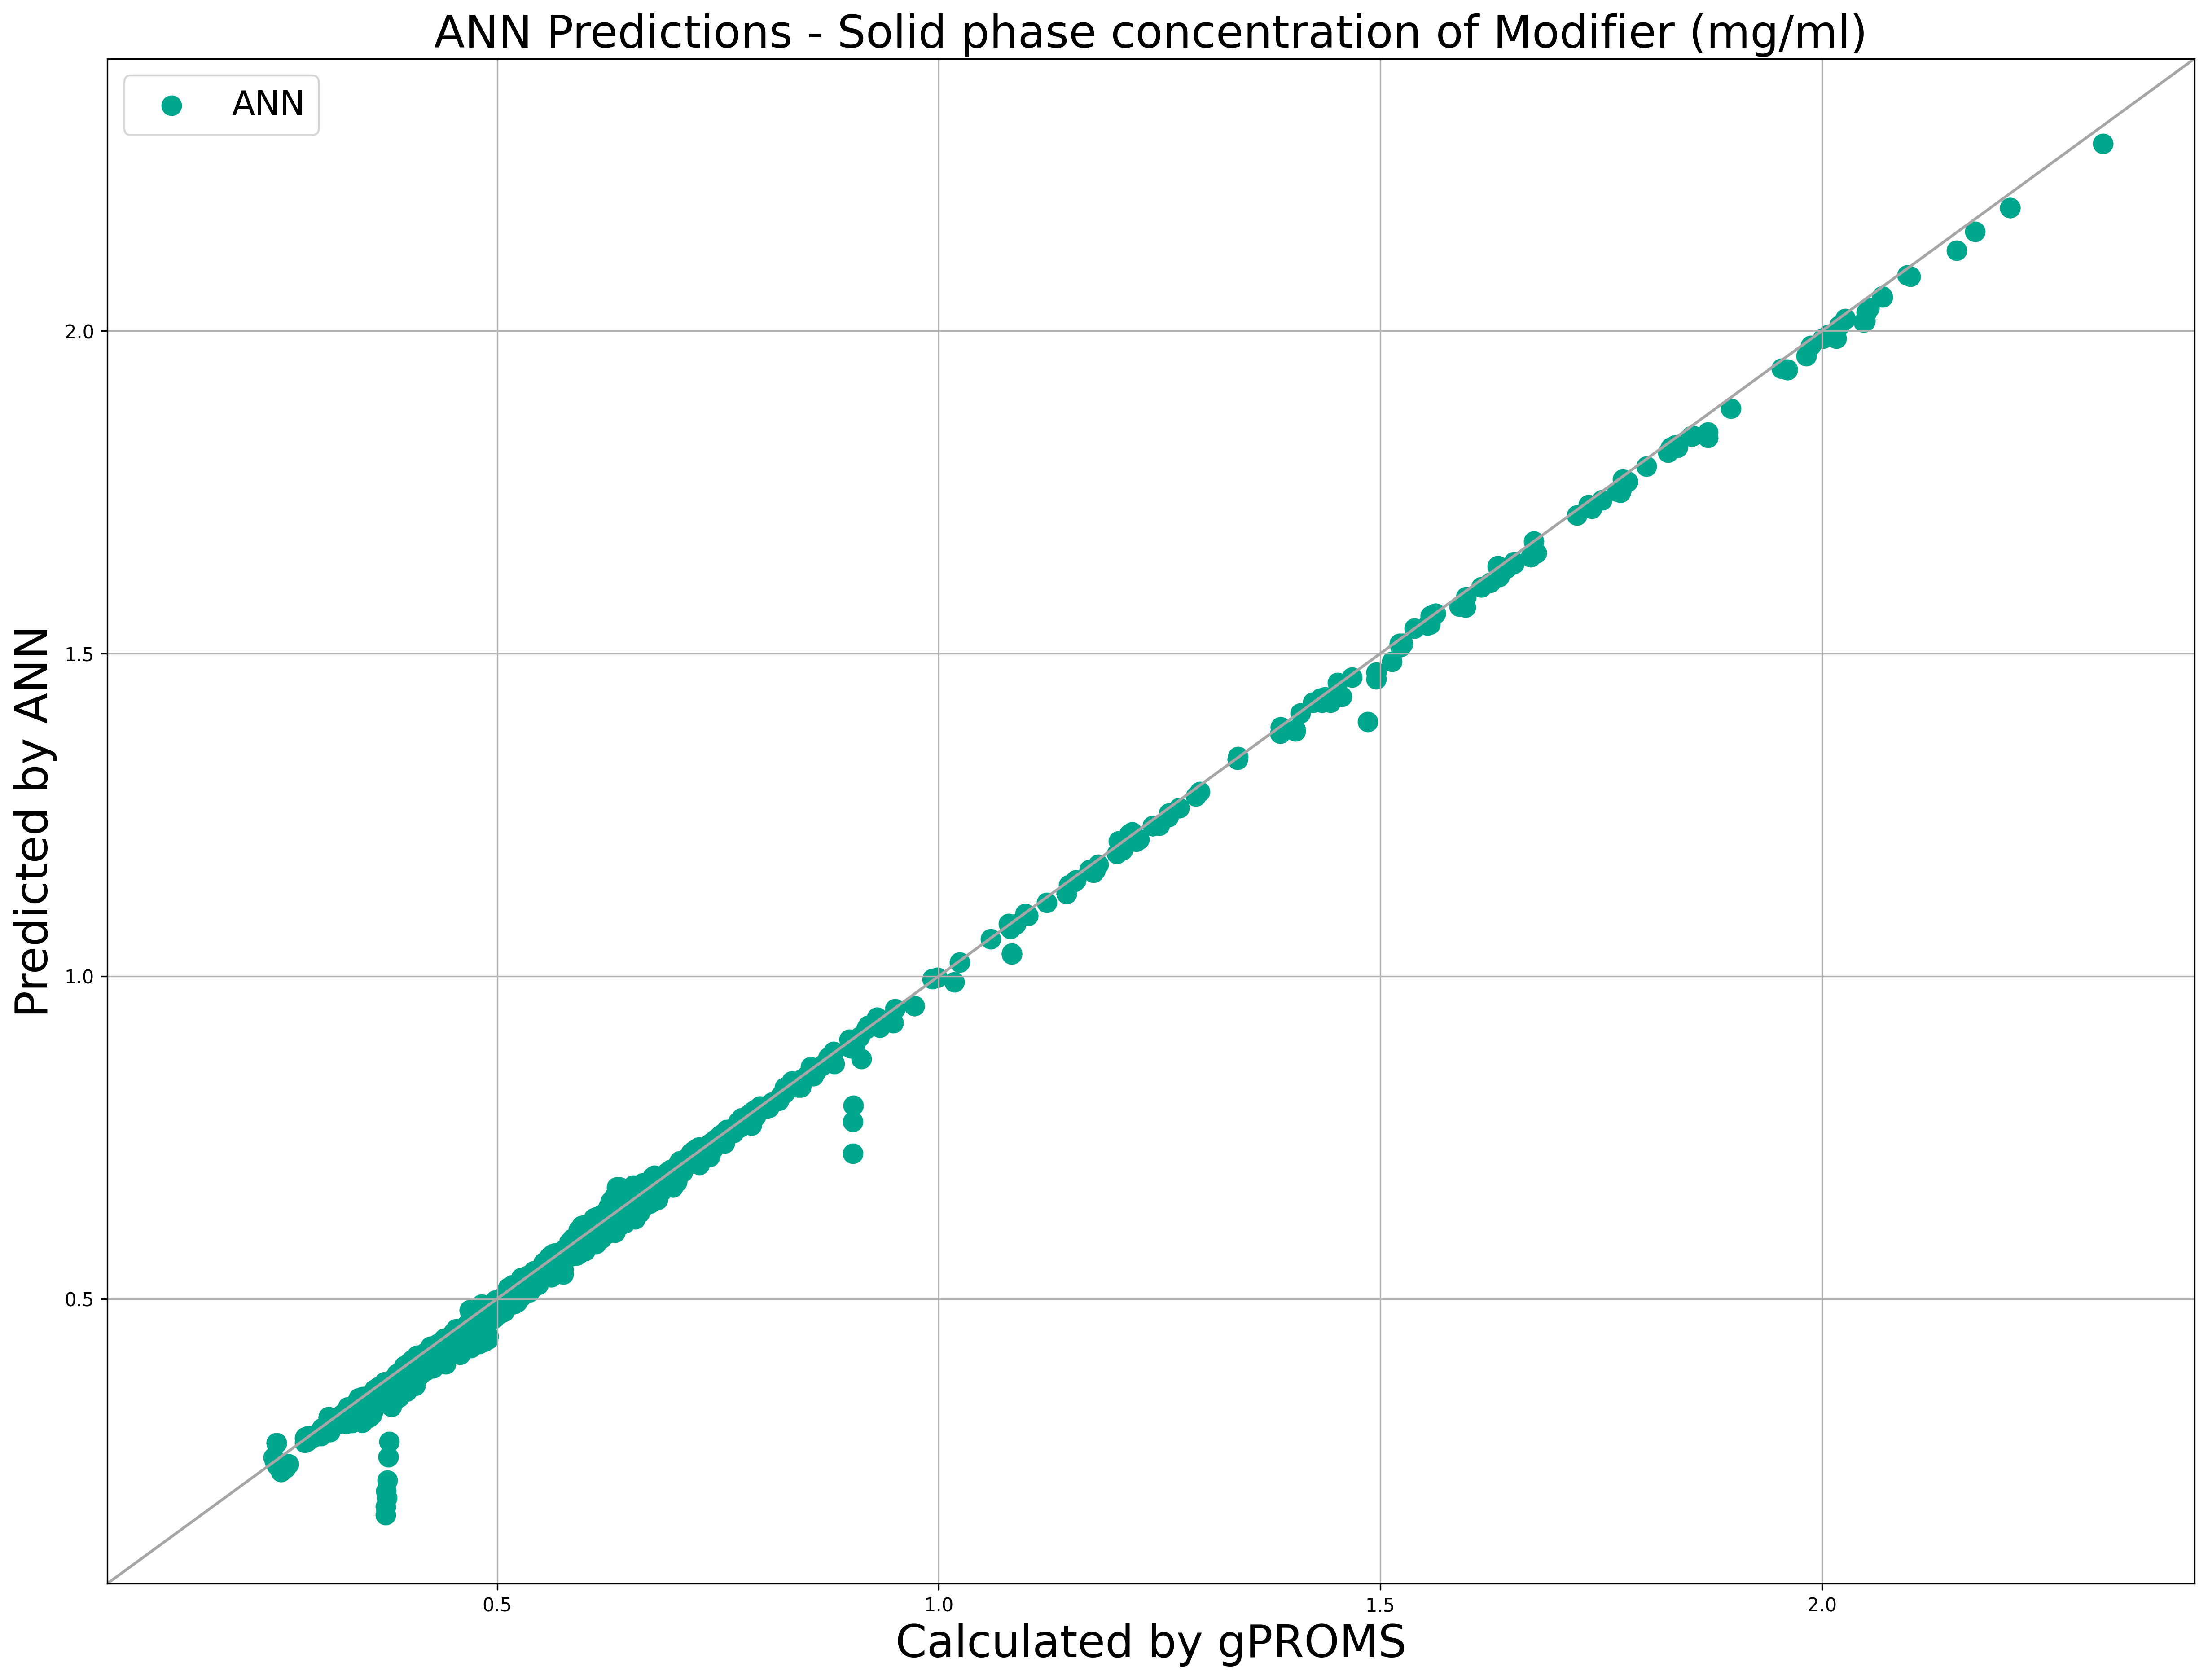

time: 17.6 s (started: 2021-06-23 11:17:28 +00:00)


In [25]:
scatter('ALL_SPC_1_1_1',0,'Solid phase concentration of Modifier (mg/ml)')

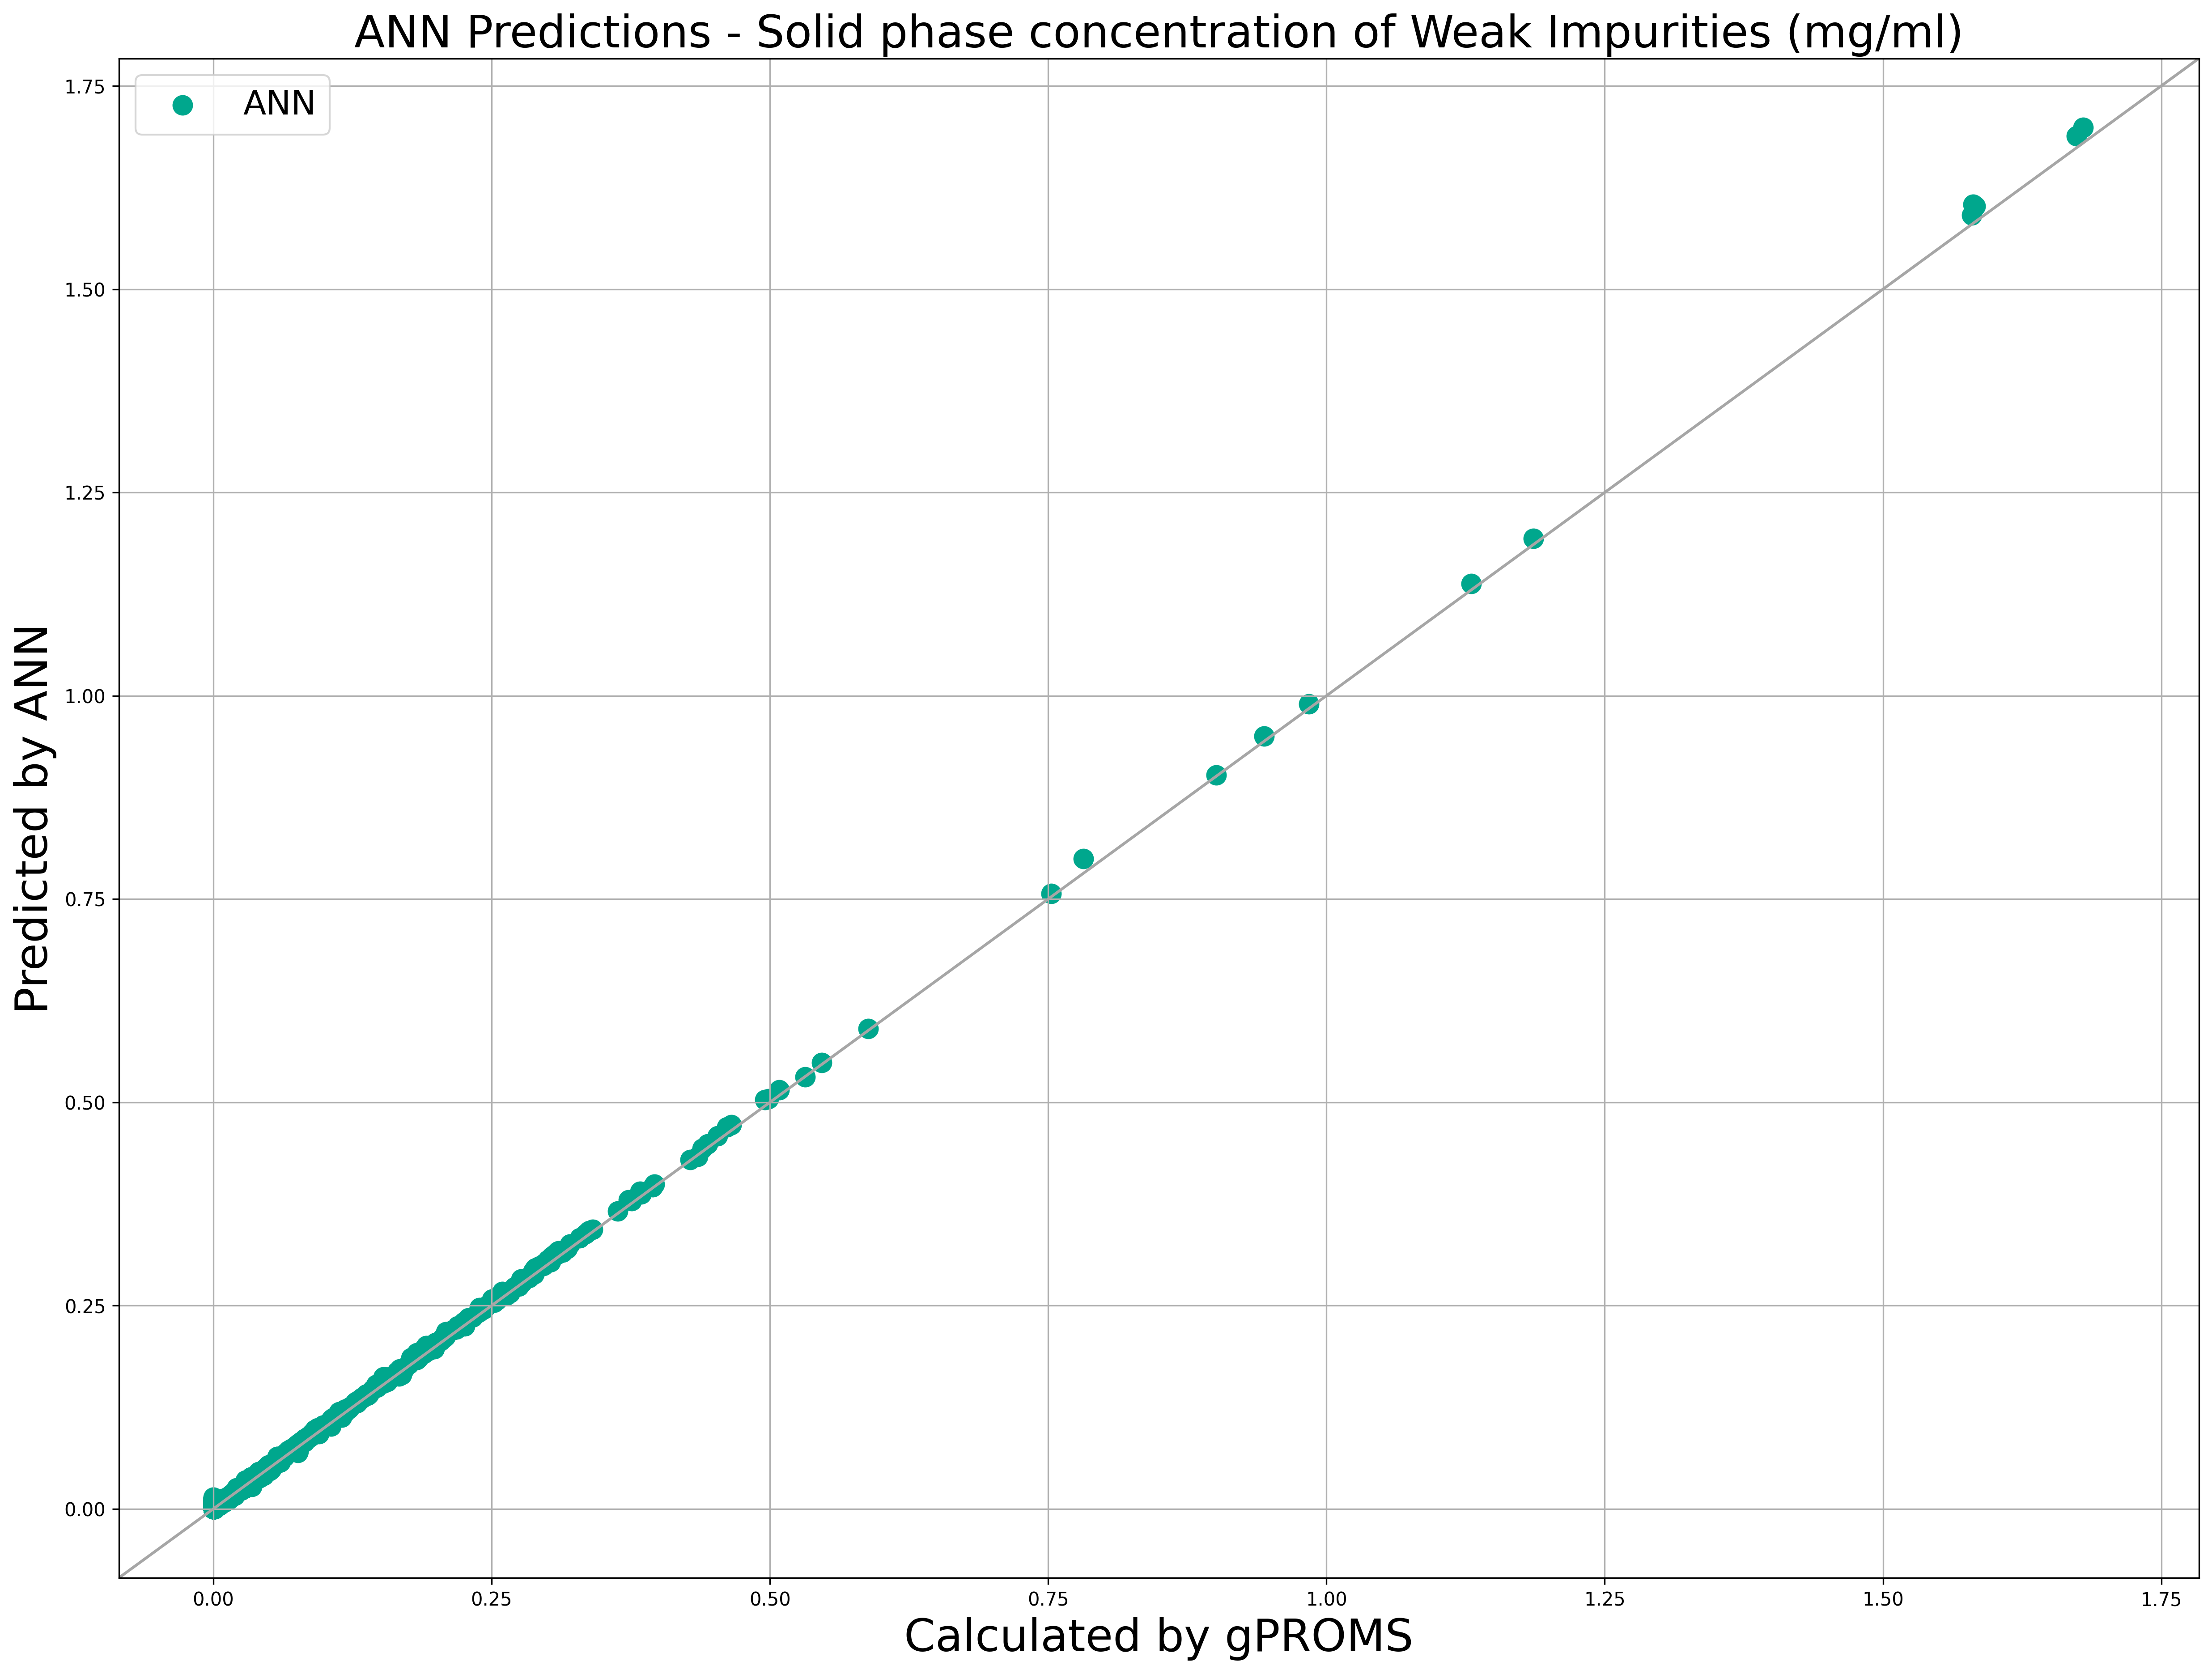

time: 21.8 s (started: 2021-06-23 11:17:46 +00:00)


In [26]:
scatter('ALL_SPC_1_2_1',1,'Solid phase concentration of Weak Impurities (mg/ml)')

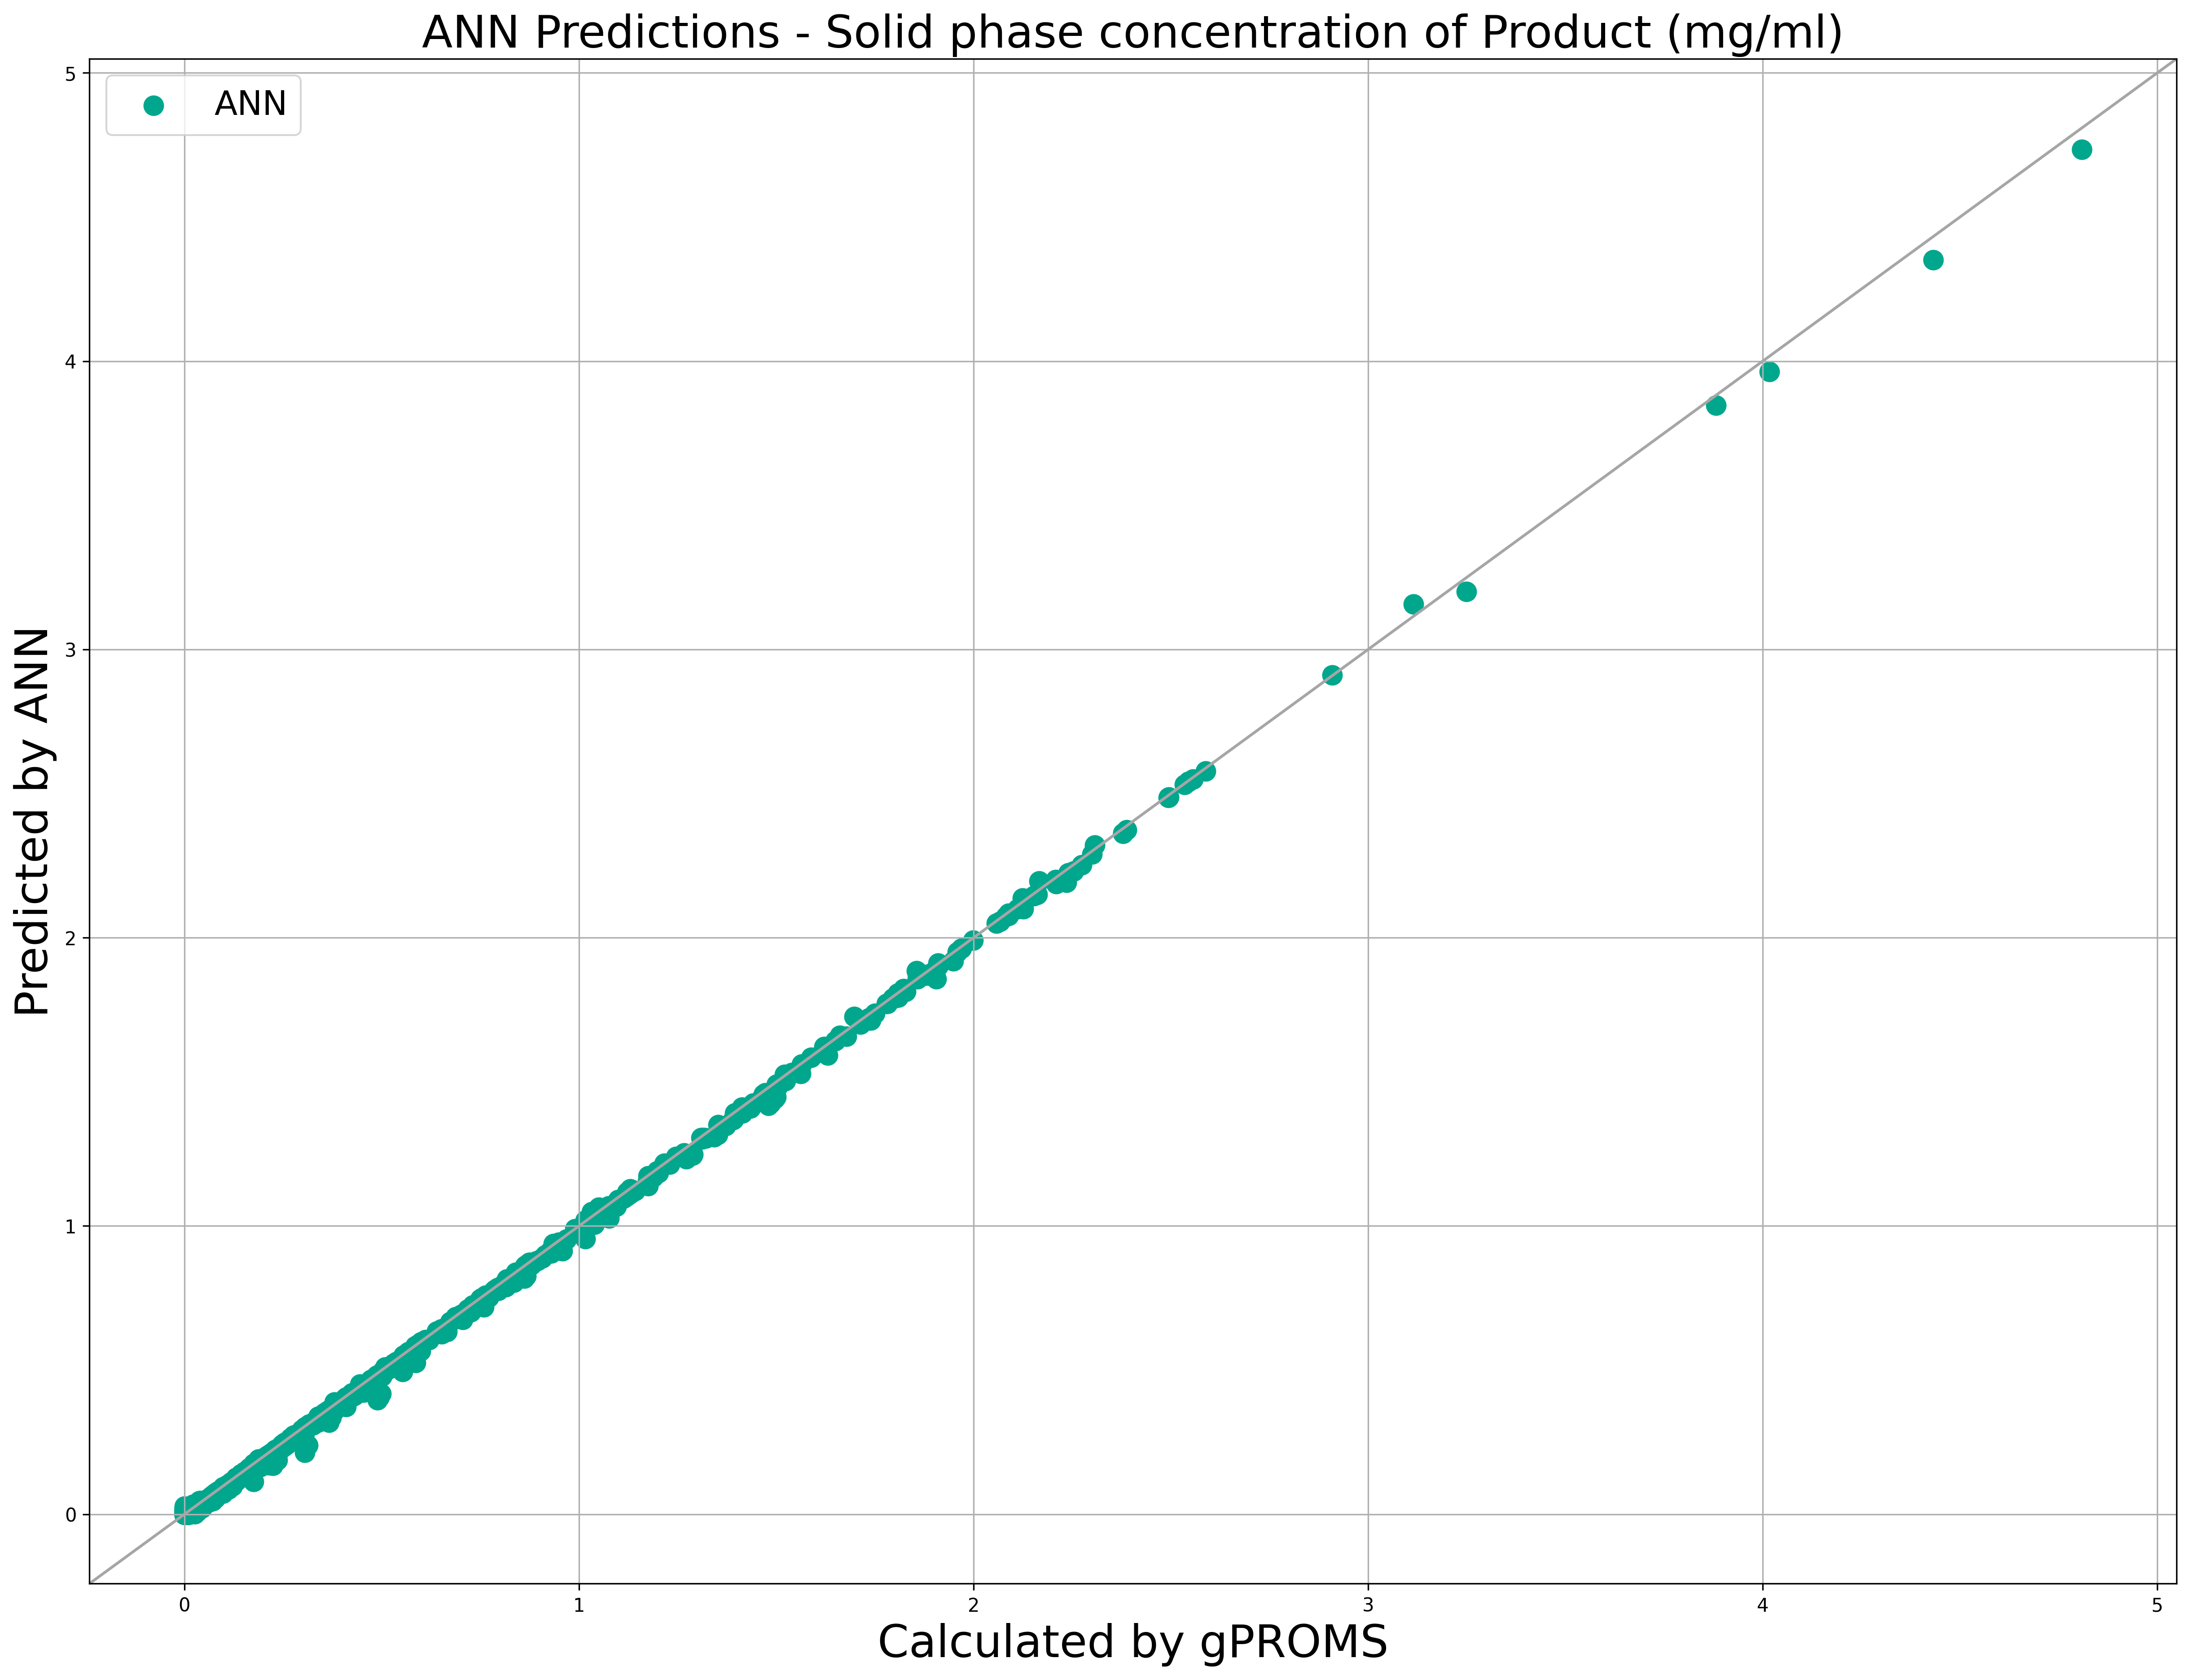

time: 17.9 s (started: 2021-06-23 11:18:08 +00:00)


In [27]:
scatter('ALL_SPC_1_3_1',2,'Solid phase concentration of Product (mg/ml)')

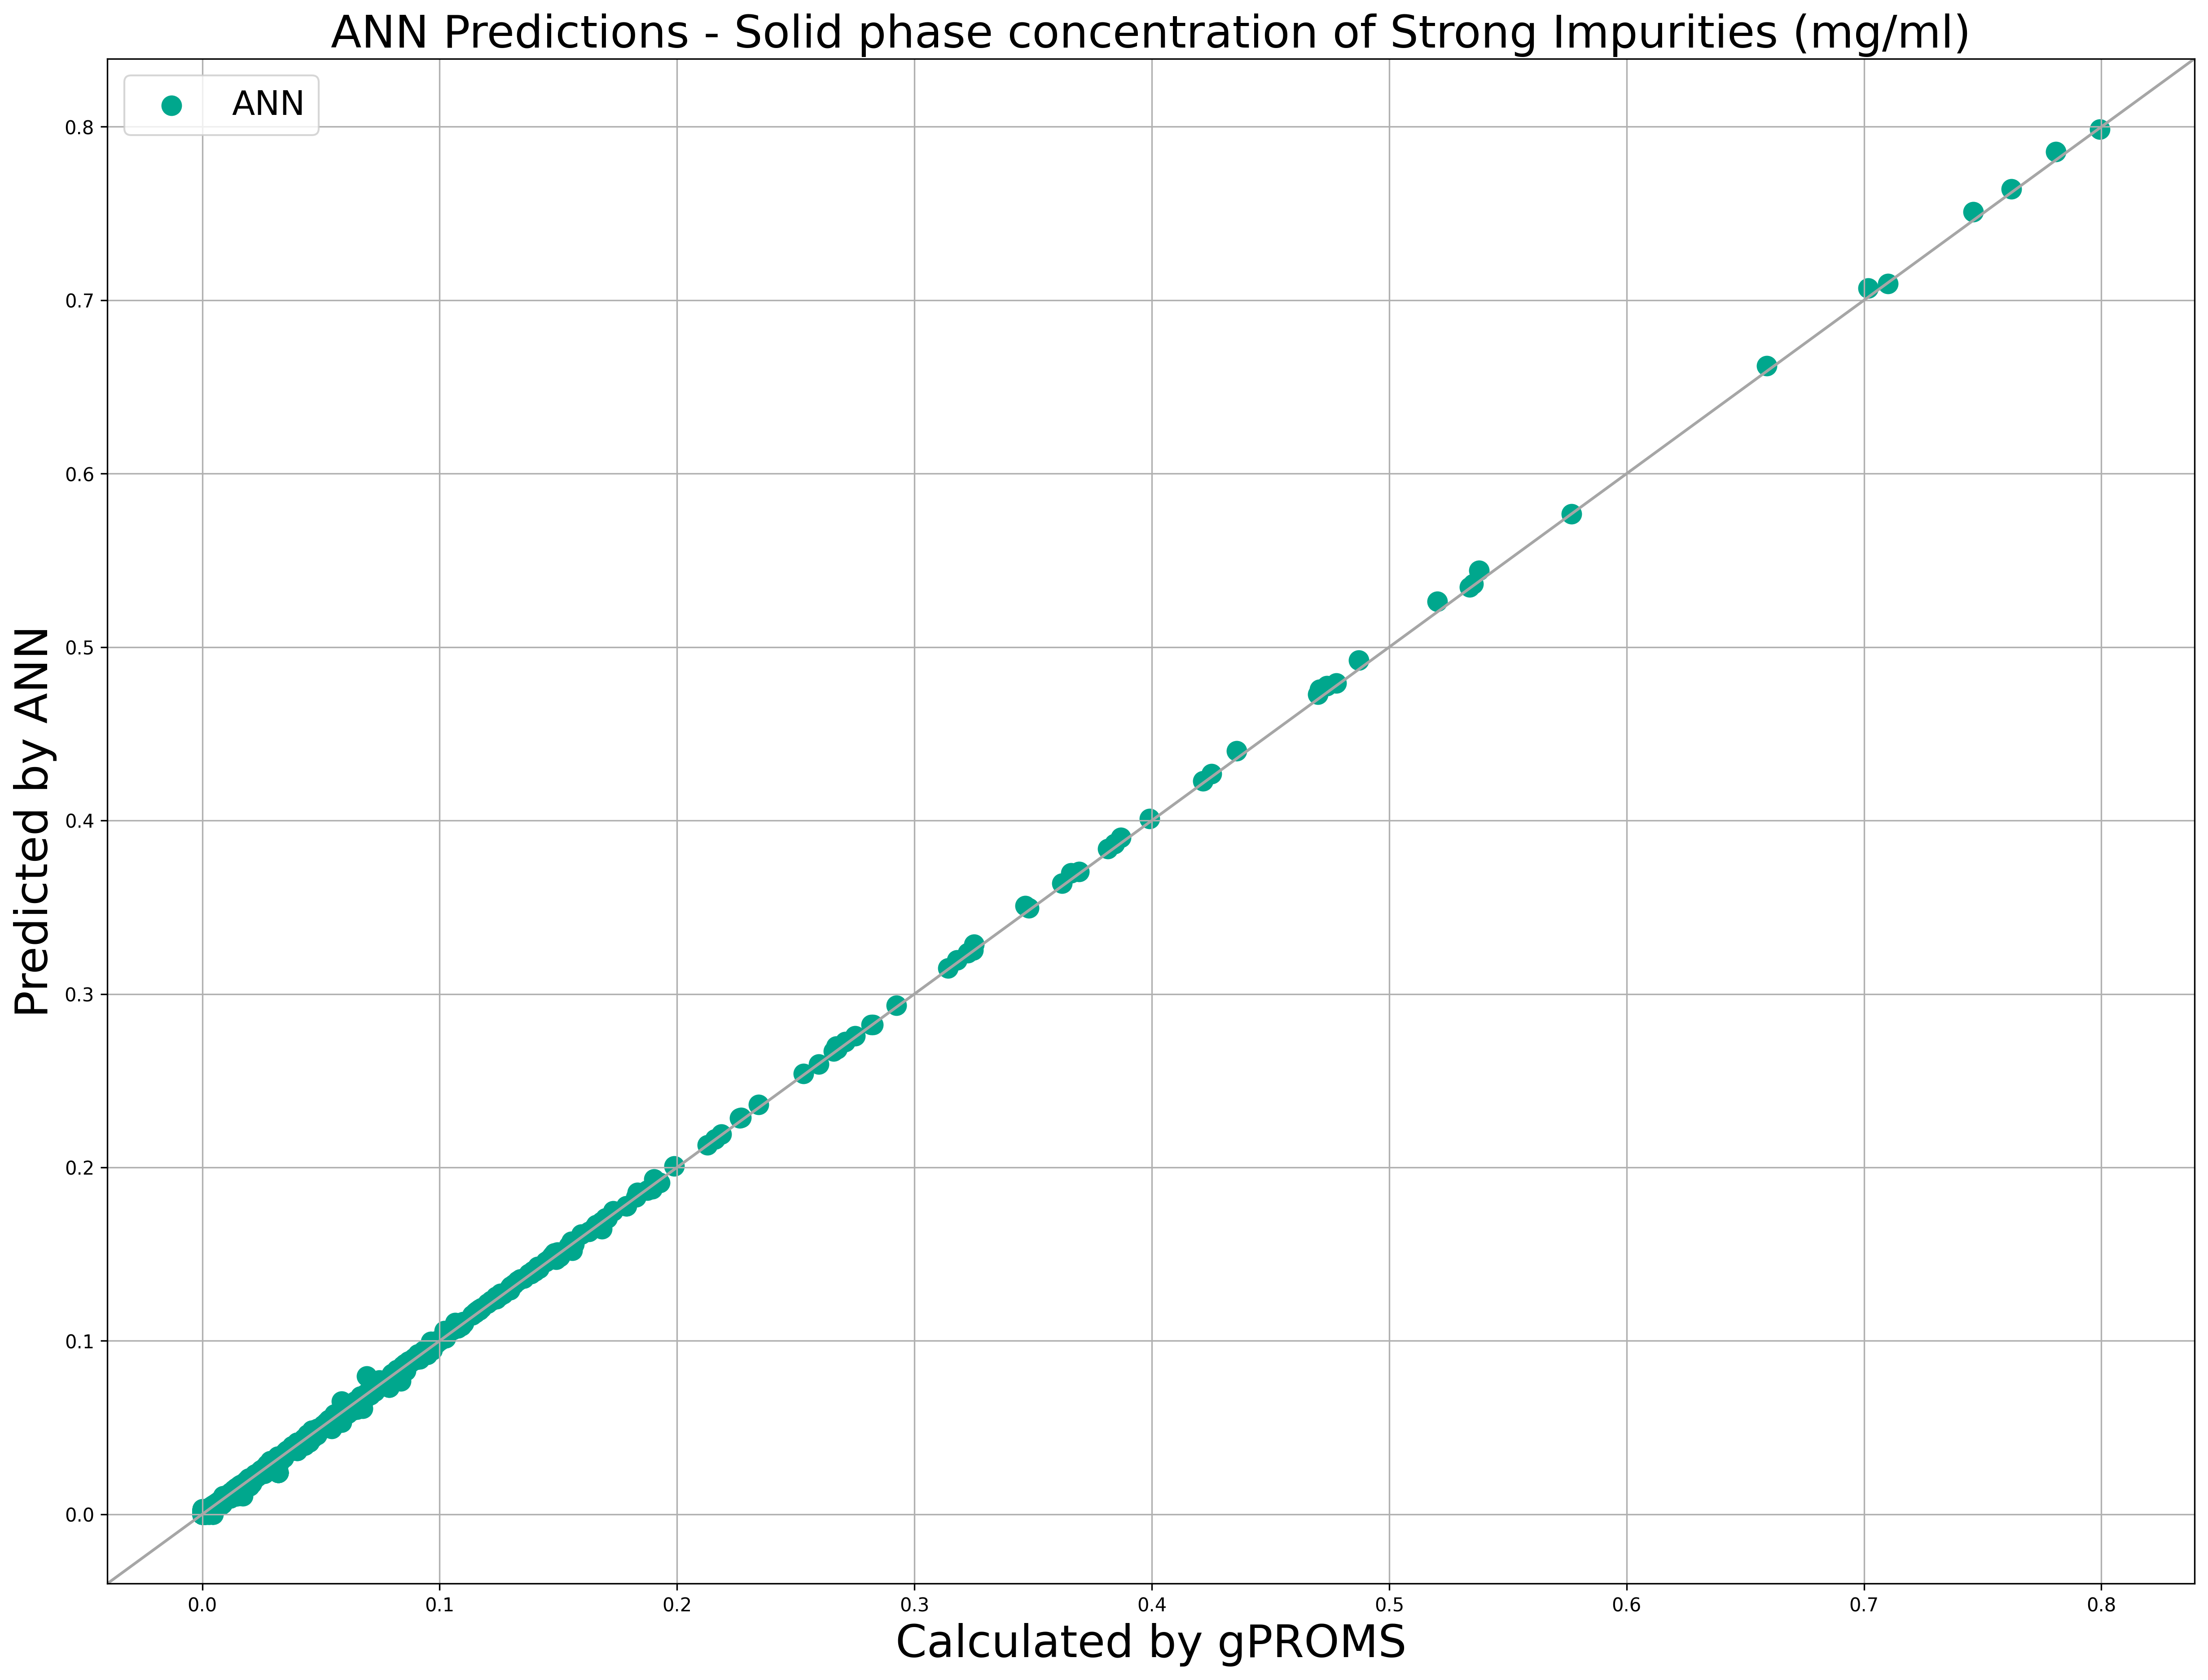

time: 16.6 s (started: 2021-06-23 11:18:26 +00:00)


In [28]:
scatter('ALL_SPC_1_4_1',3,'Solid phase concentration of Strong Impurities (mg/ml)')

### Τα scatter και για τη 2η στήλη

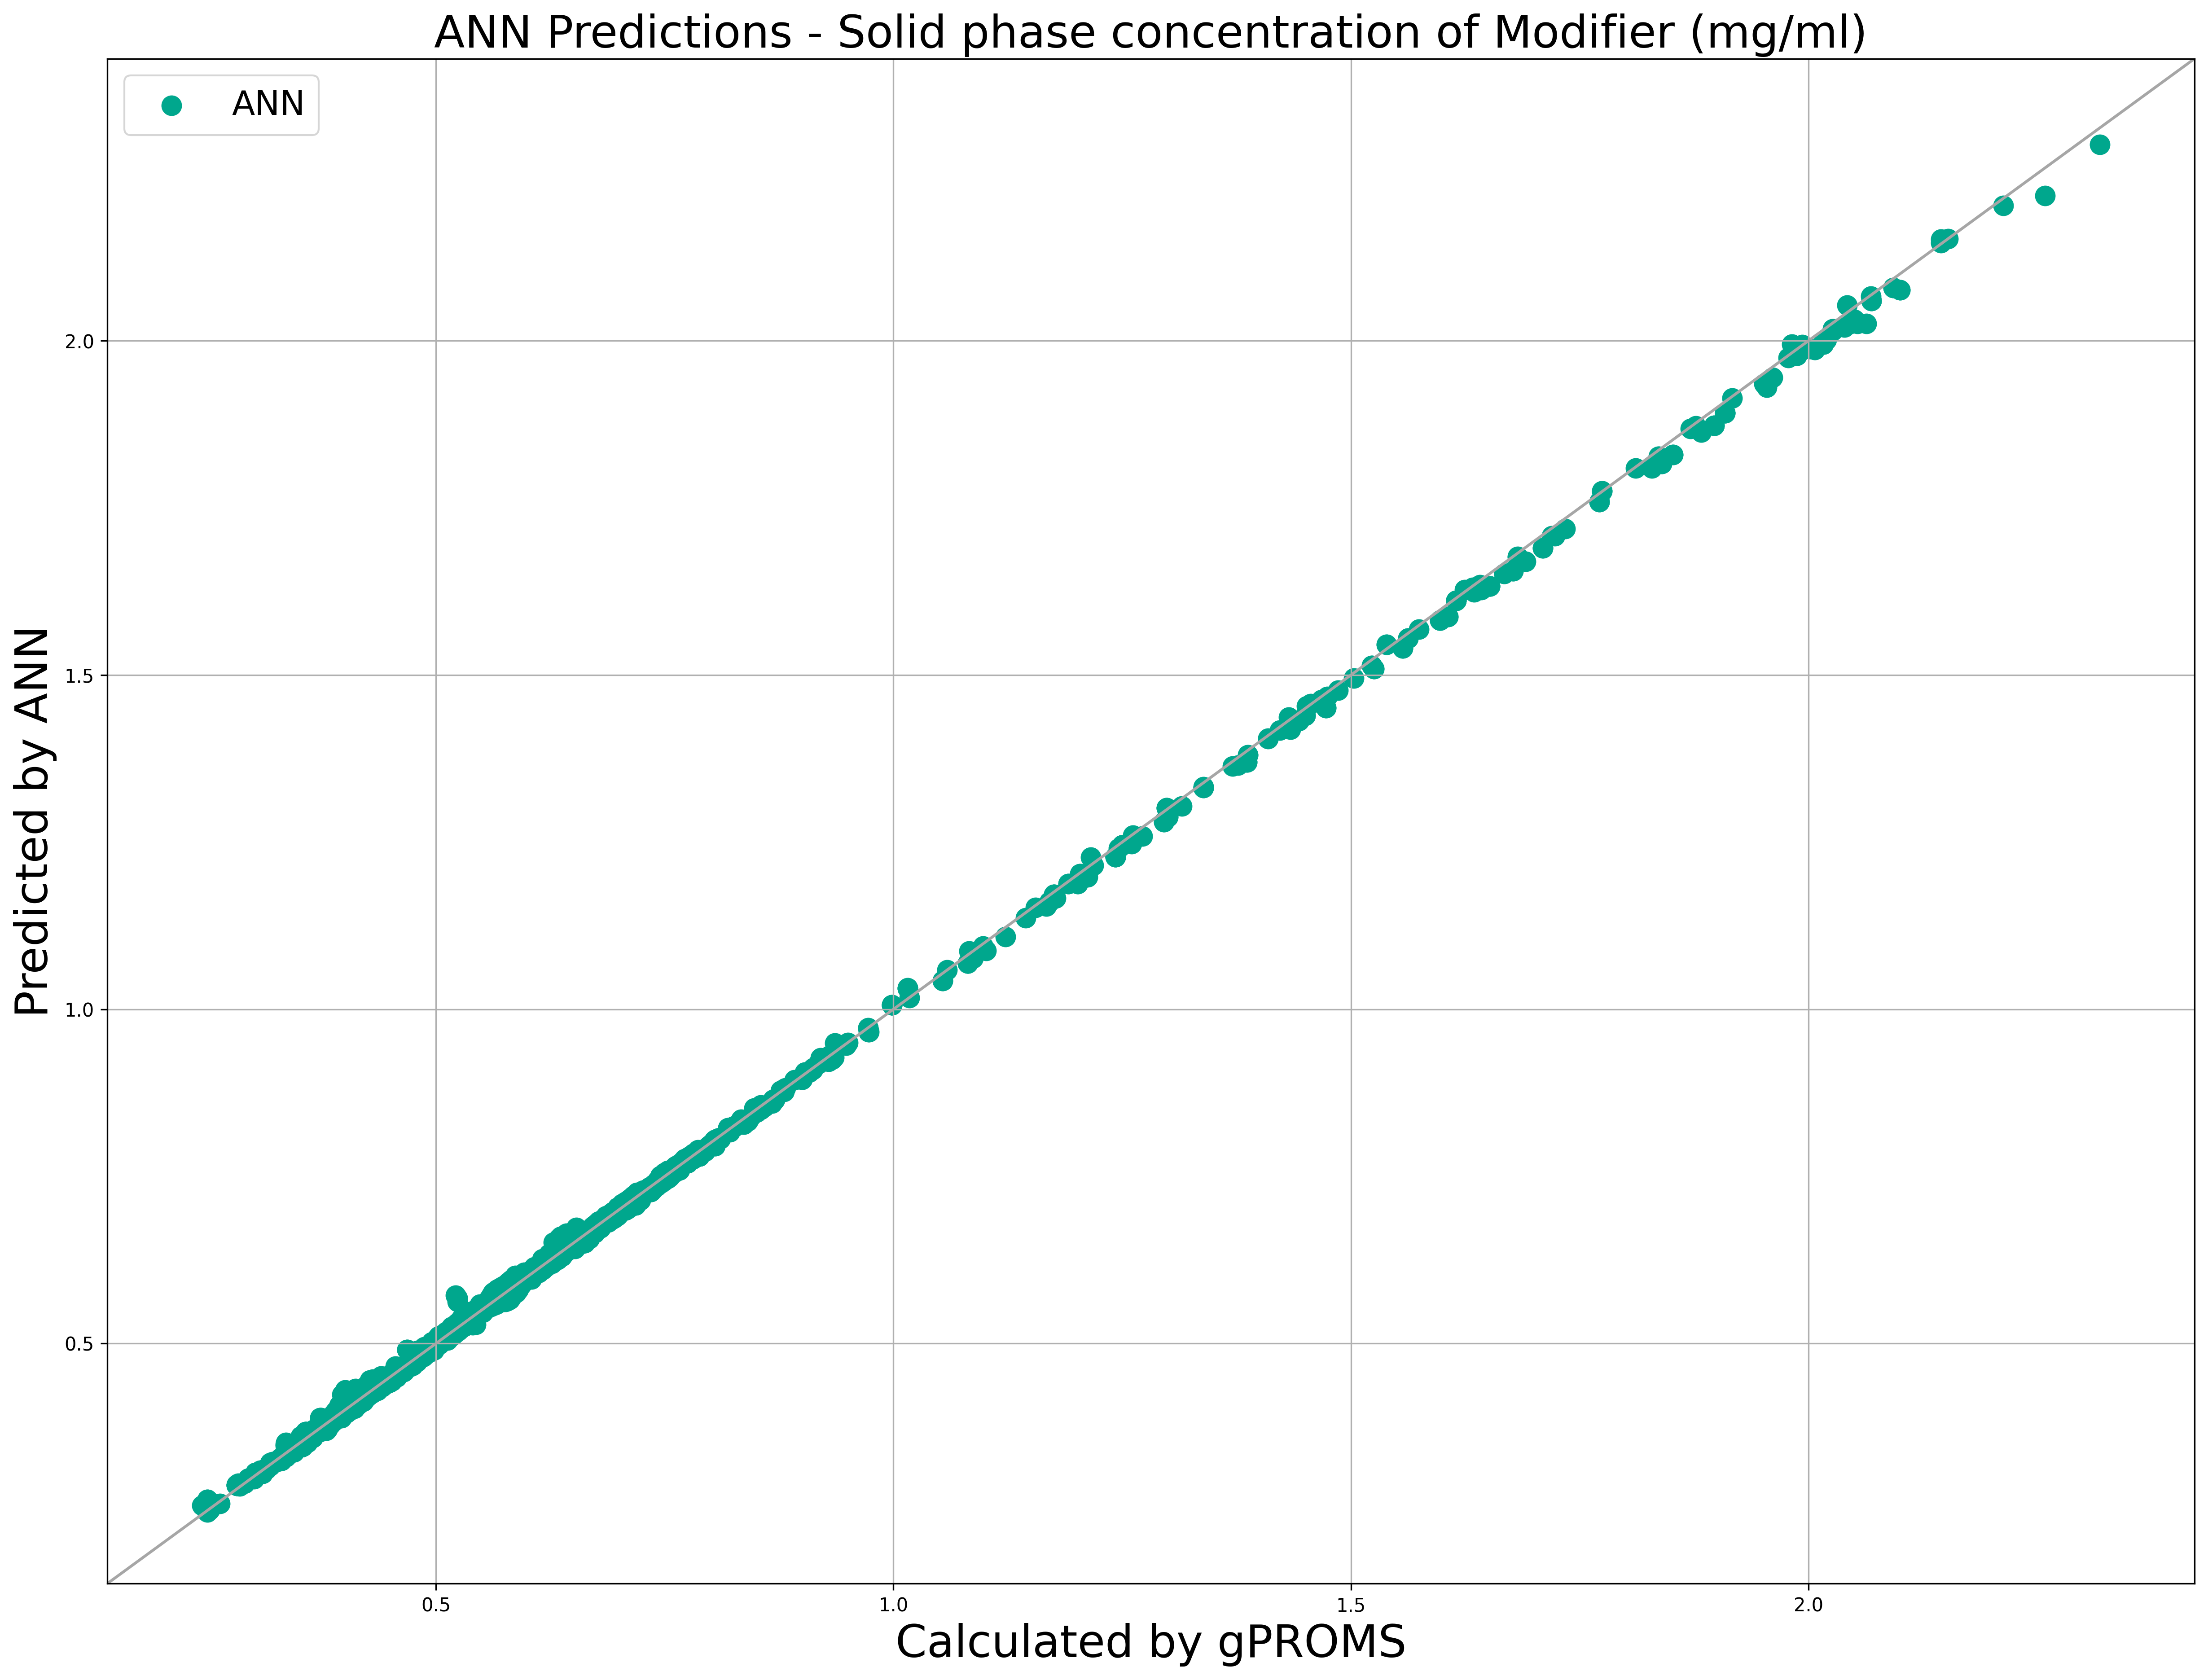

time: 13.7 s (started: 2021-06-23 11:18:42 +00:00)


In [29]:
scatter('ALL_SPC_2_1_1',4,'Solid phase concentration of Modifier (mg/ml)')

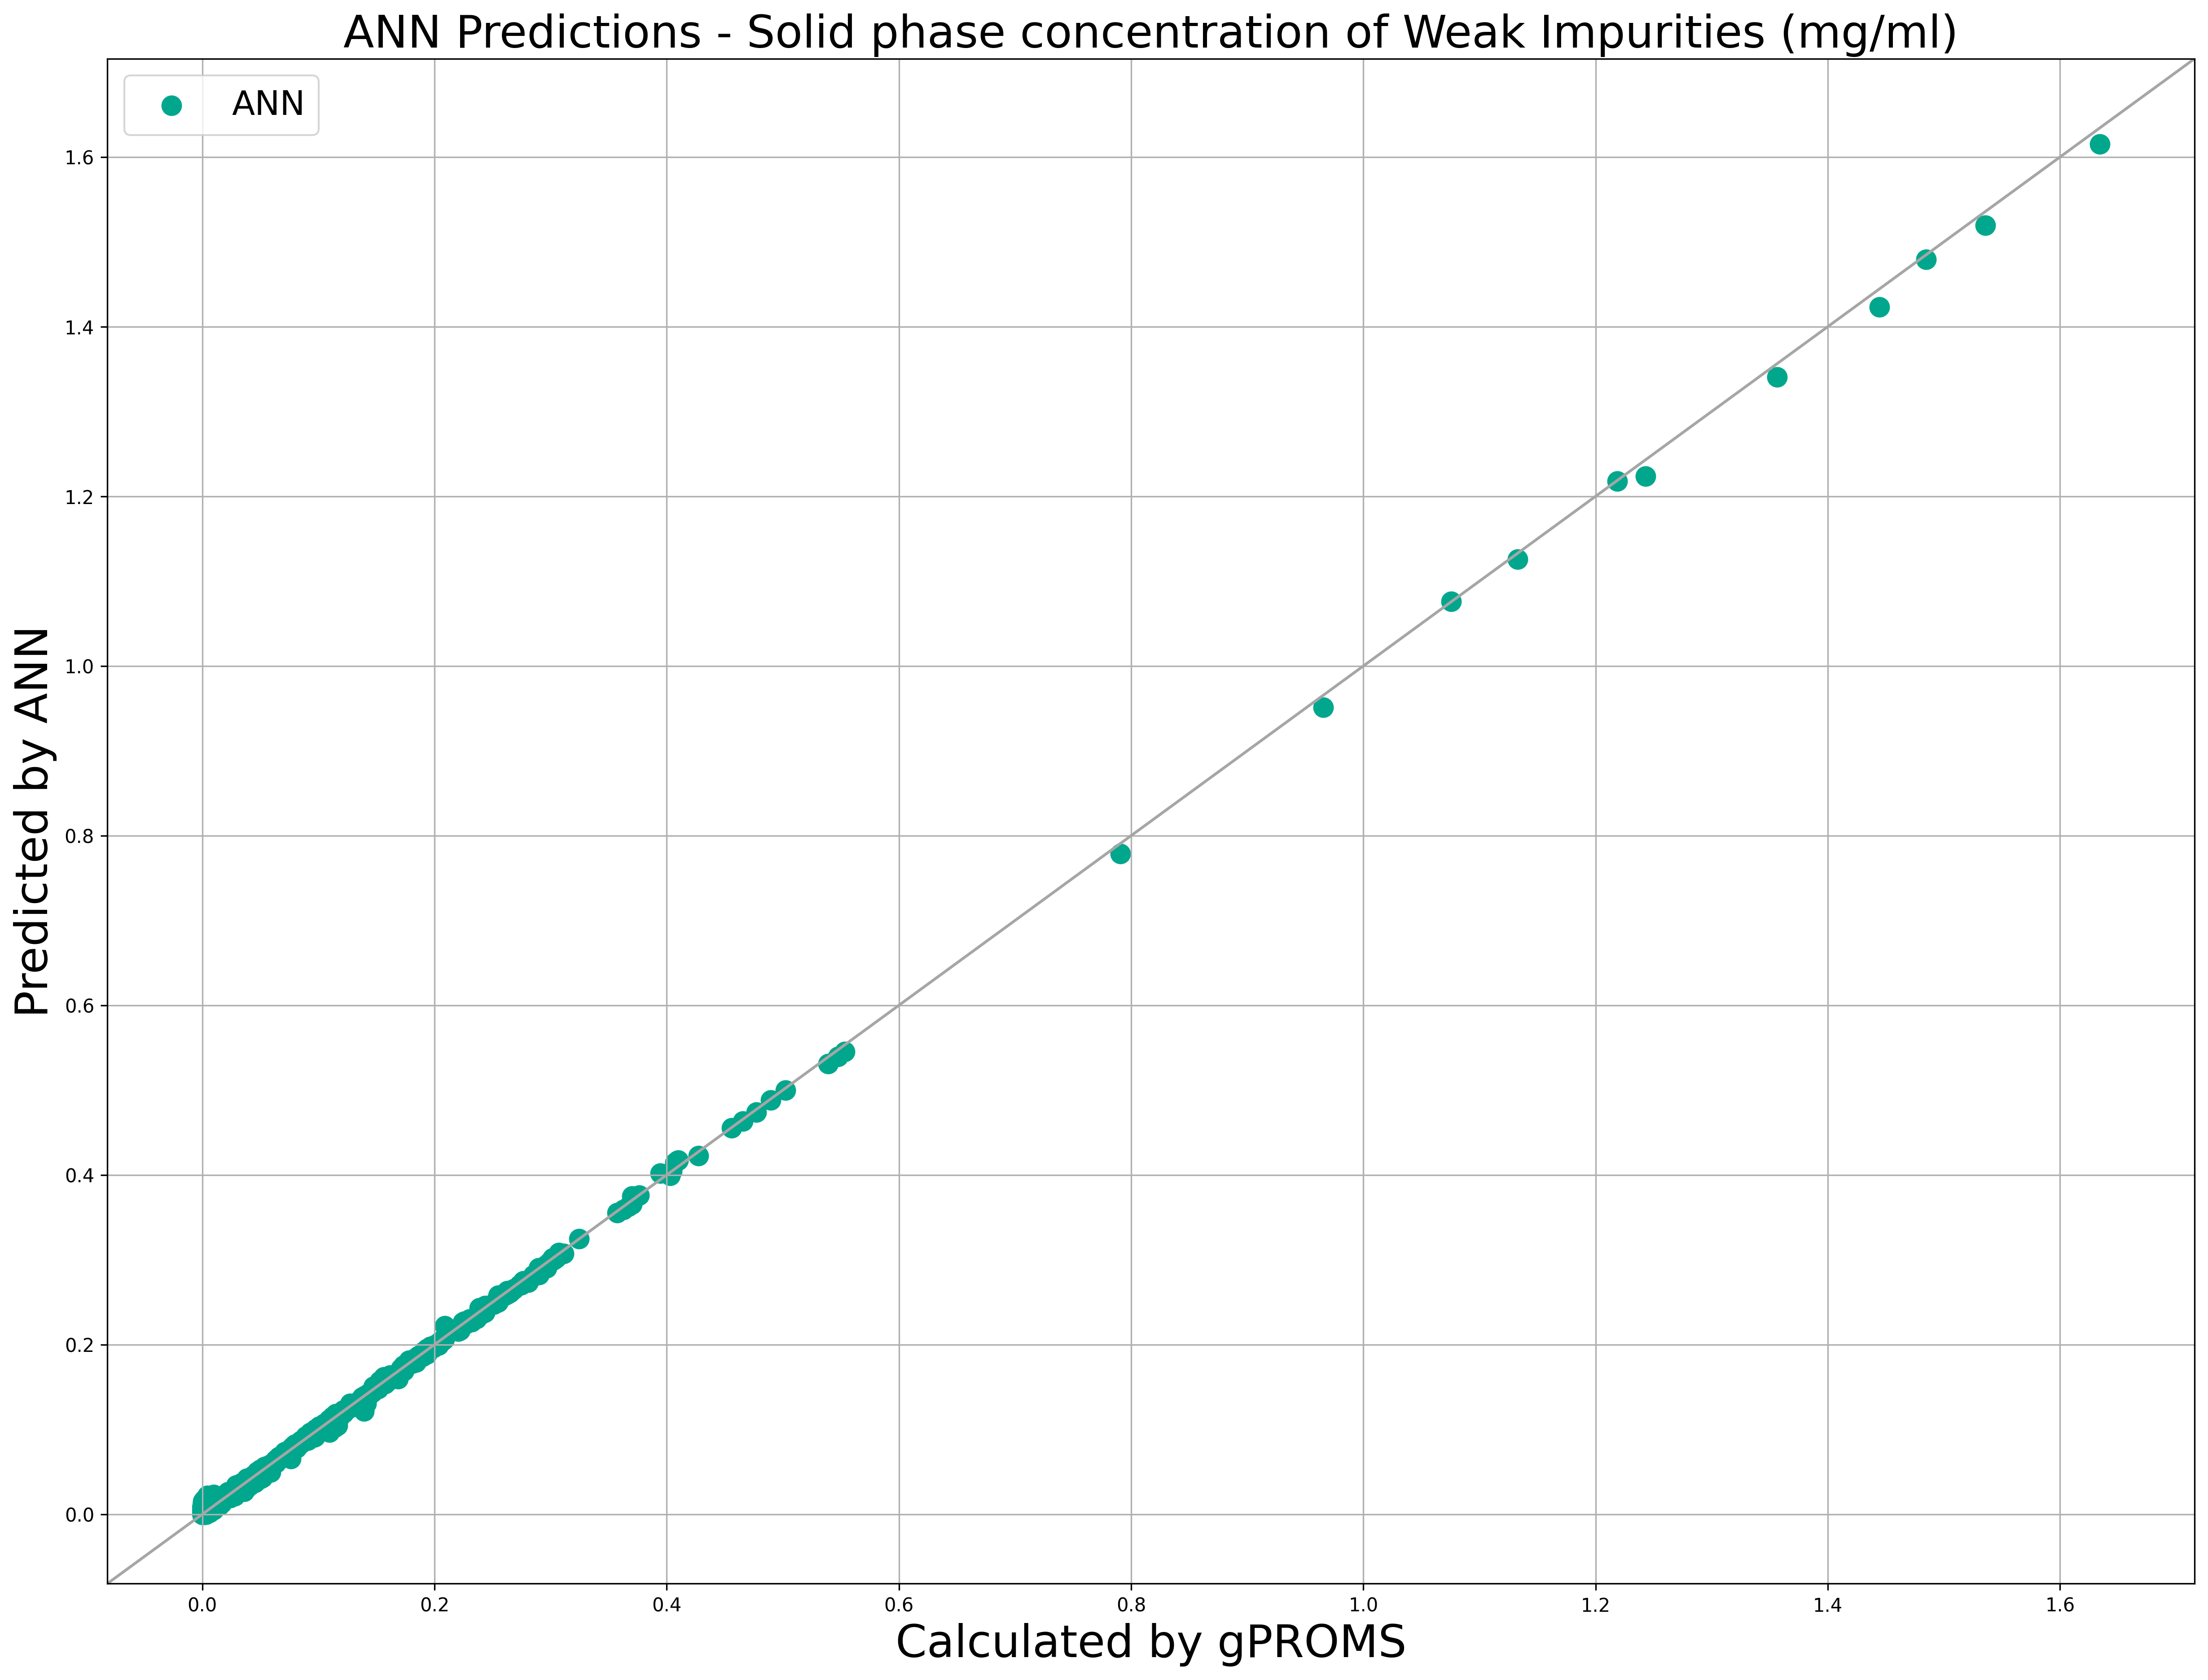

time: 16.3 s (started: 2021-06-23 11:18:56 +00:00)


In [30]:
scatter('ALL_SPC_2_2_1',5,'Solid phase concentration of Weak Impurities (mg/ml)')

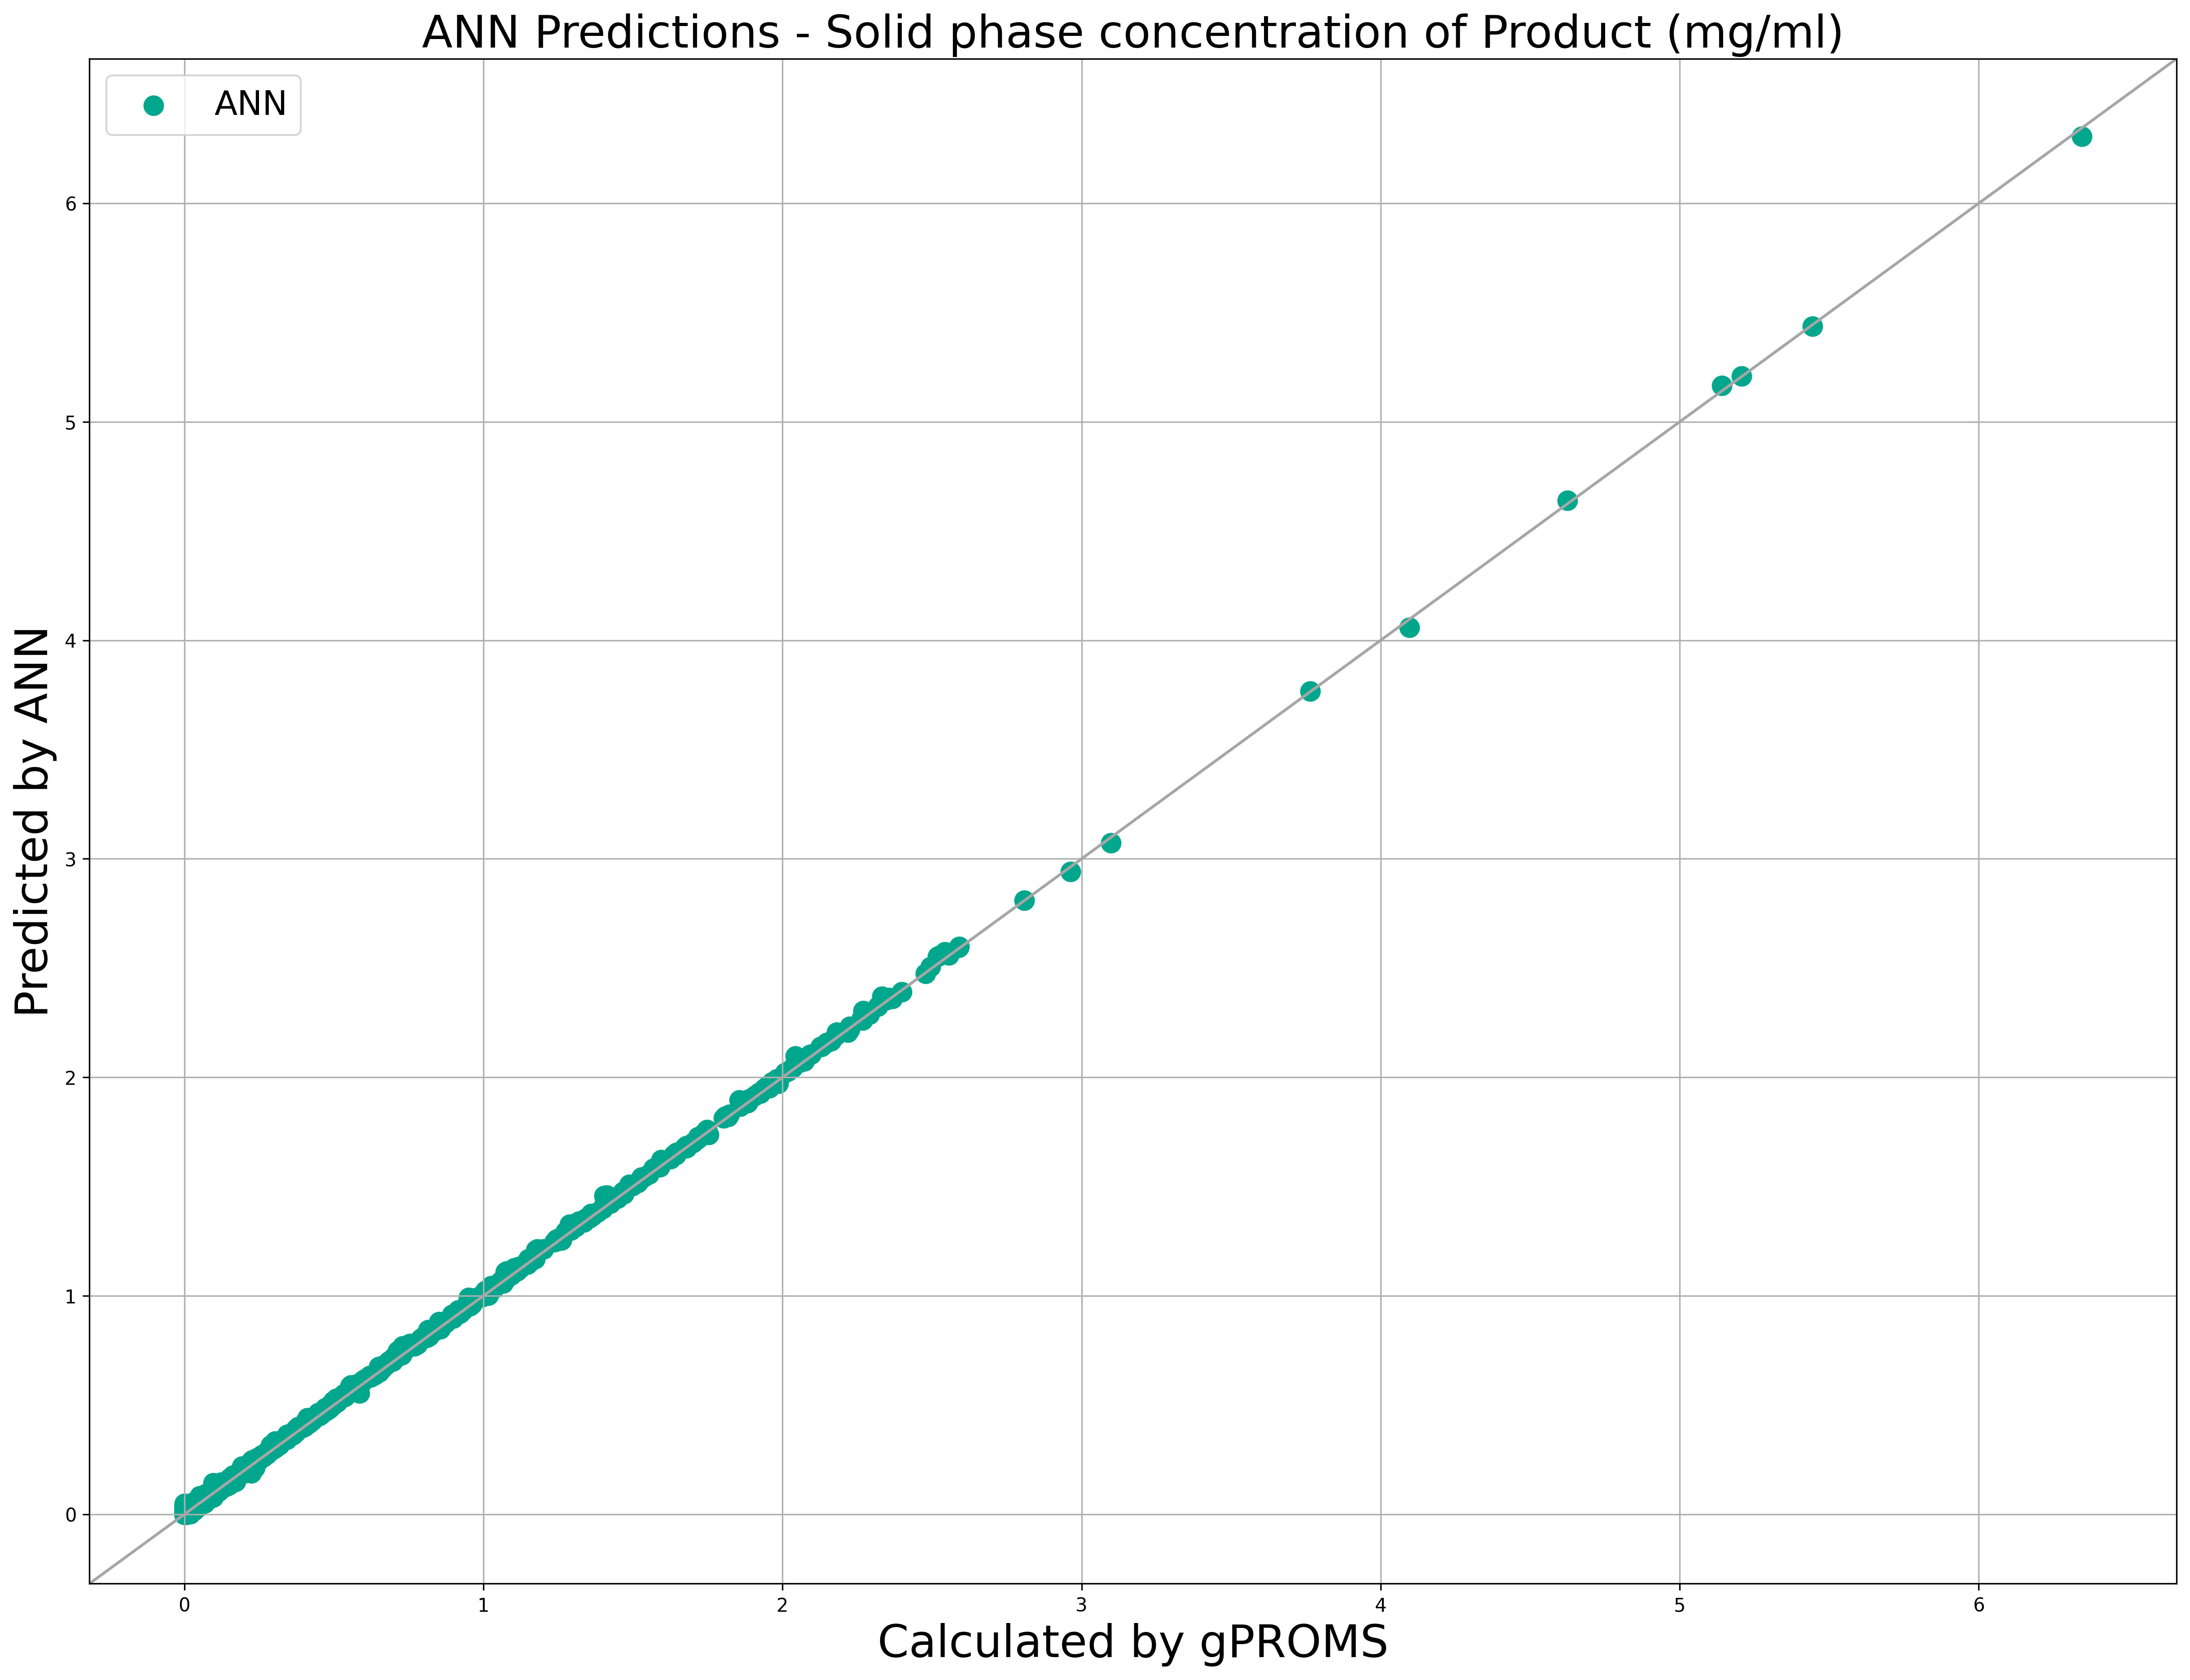

time: 14.5 s (started: 2021-06-23 11:19:13 +00:00)


In [31]:
scatter('ALL_SPC_2_3_1',6,'Solid phase concentration of Product (mg/ml)')

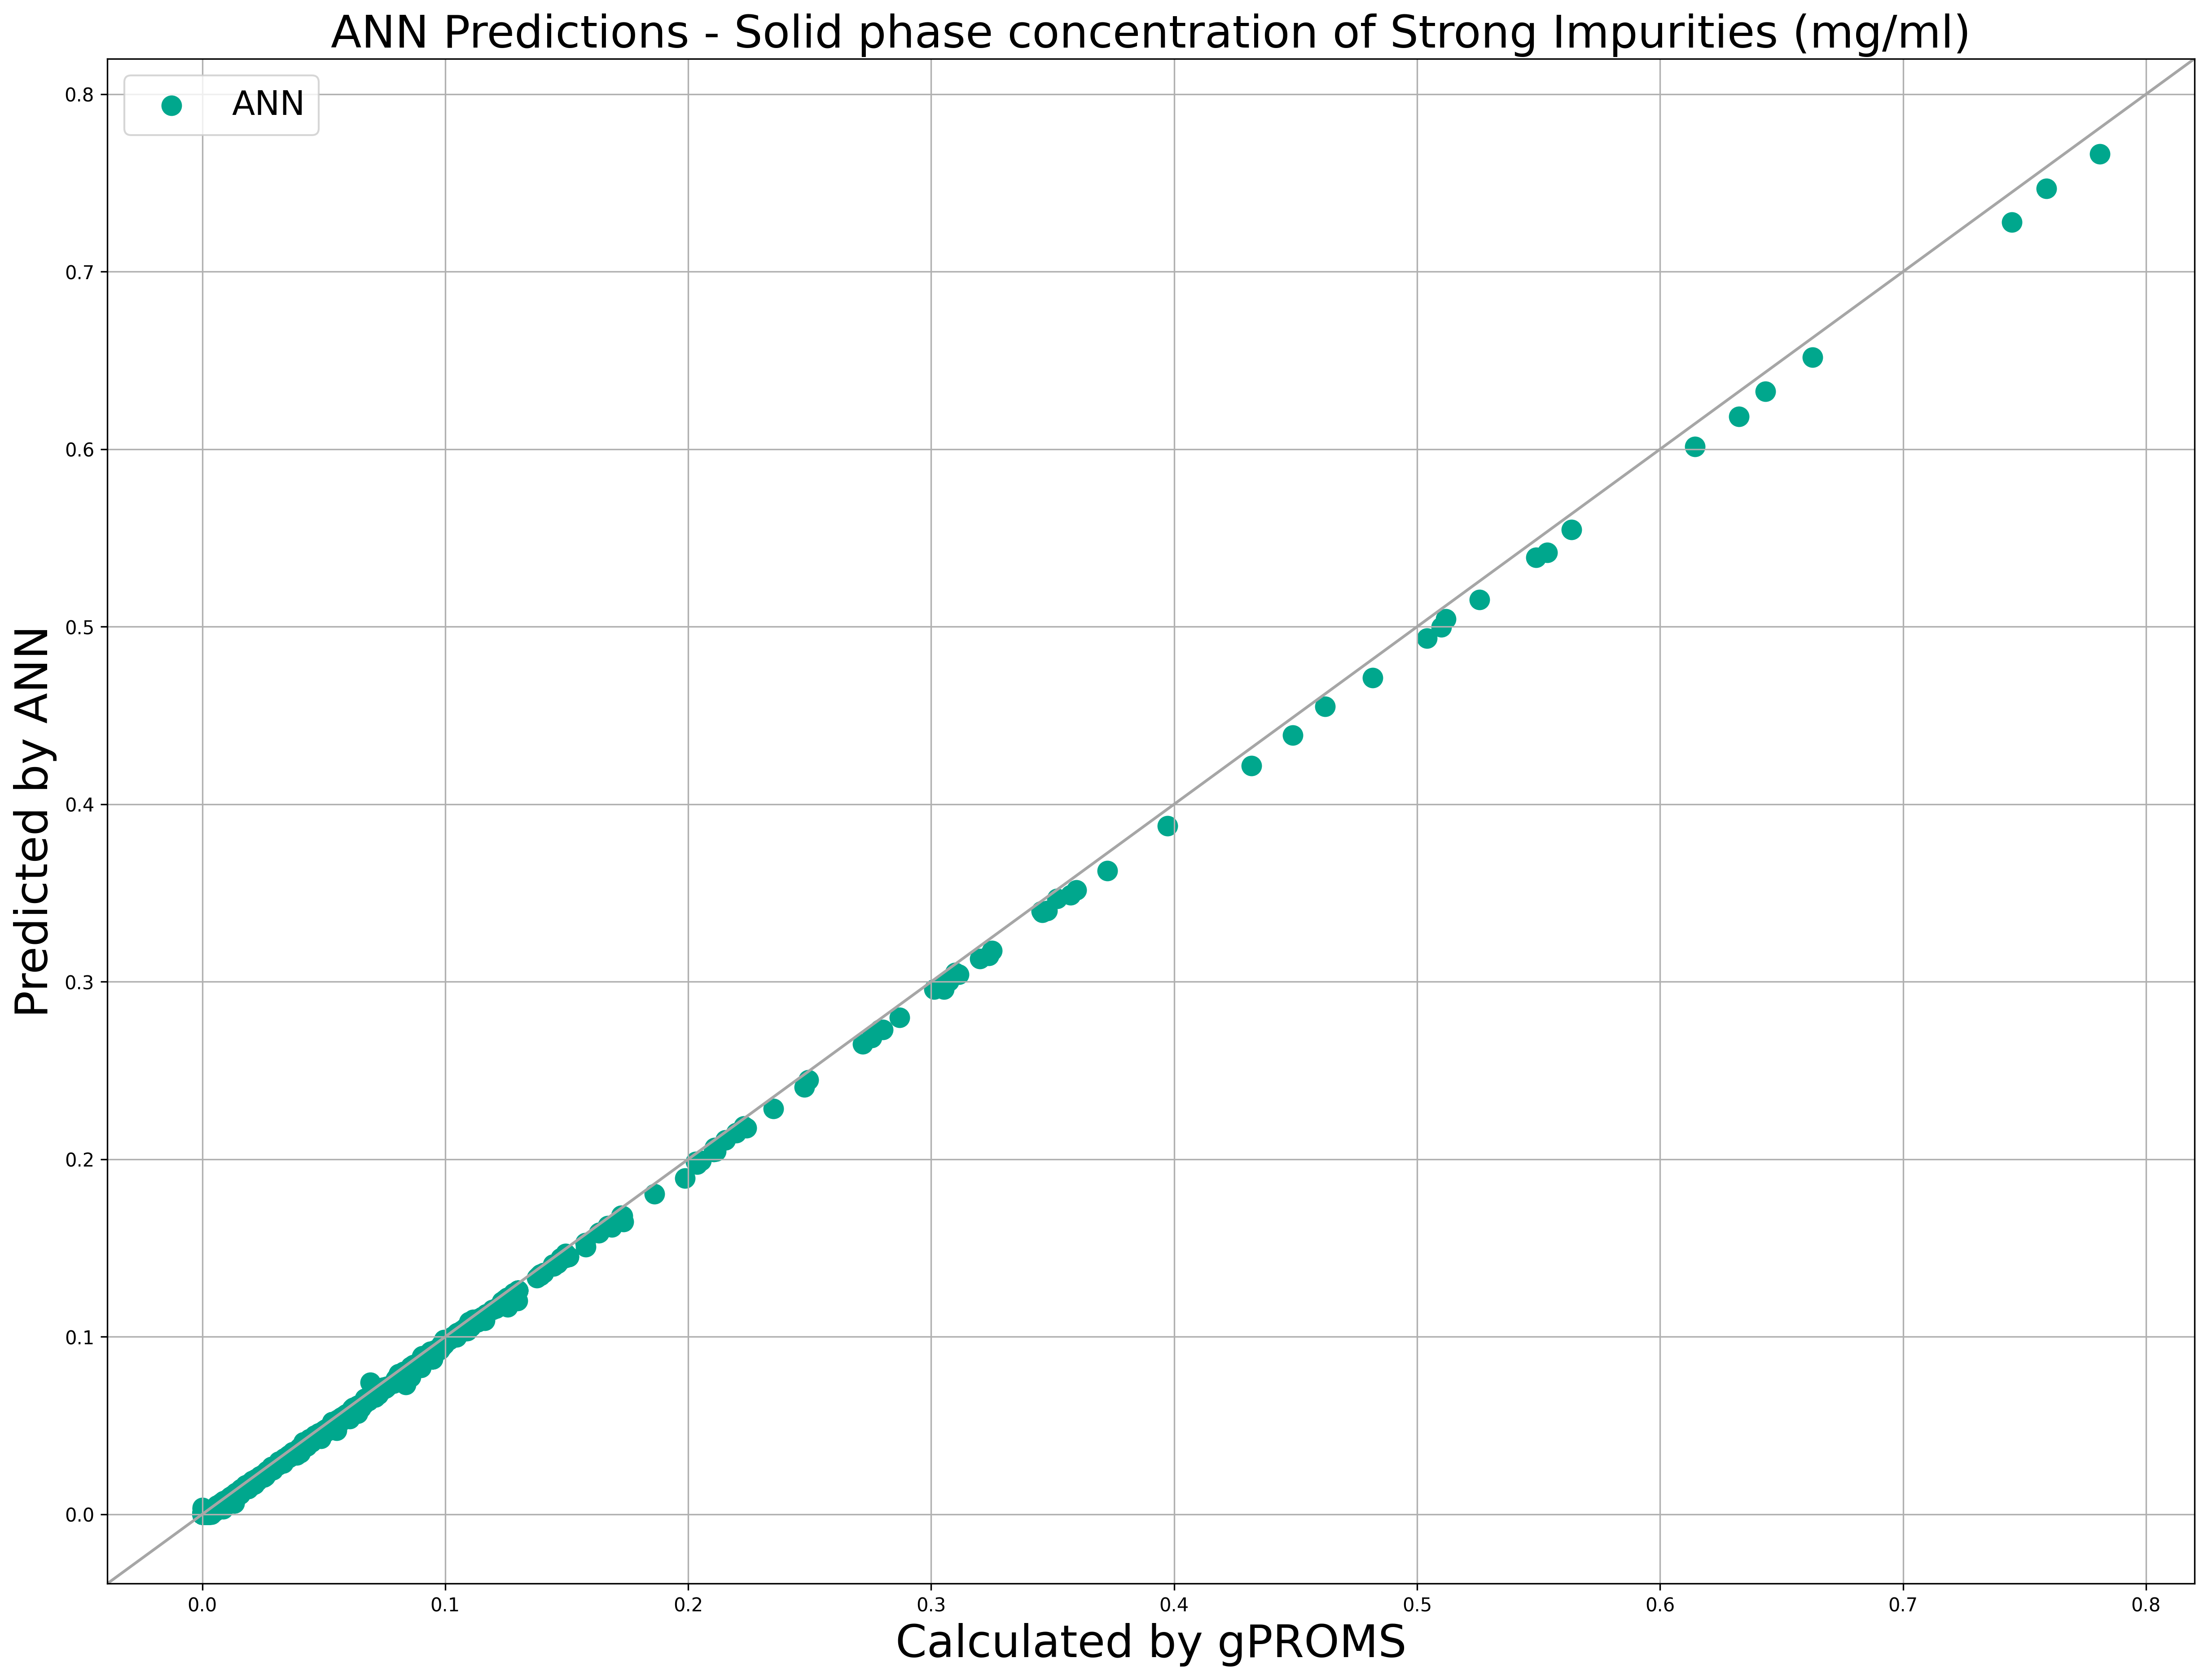

time: 19.4 s (started: 2021-06-23 11:19:27 +00:00)


In [32]:
scatter('ALL_SPC_2_4_1',7,'Solid phase concentration of Strong Impurities (mg/ml)')

## Μελέτη απόδοσης προβλέψεων σε τιμές `>=0,1`

In [33]:
yhat_big = yhat[yhat >= 0.1]
ytest_big = y_test[y_test >= 0.1]

time: 191 ms (started: 2021-06-23 11:19:47 +00:00)


In [34]:
def mae_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(mean_absolute_error(df1[column], df2[number]),'\n')

time: 1.53 ms (started: 2021-06-23 11:19:48 +00:00)


In [35]:
mae_big('ALL_SPC_1_2_1',1)
mae_big('ALL_SPC_1_3_1',2)
mae_big('ALL_SPC_1_4_1',3)
mae_big('ALL_SPC_2_1_1',4)
mae_big('ALL_SPC_2_2_1',5)
mae_big('ALL_SPC_2_3_1',6)
mae_big('ALL_SPC_2_4_1',7)

0.0038341300657667283 

0.013920191779331386 

0.001472946961655575 

0.003987625534043648 

0.0030610002943489267 

0.00901710792483426 

0.005689926775062802 

time: 46 s (started: 2021-06-23 11:19:48 +00:00)


In [36]:
def r2_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(r2_score(df1[column], df2[number]),'\n')

time: 18.3 ms (started: 2021-06-23 11:20:34 +00:00)


In [37]:
r2_big('ALL_SPC_1_2_1',1)
r2_big('ALL_SPC_1_3_1',2)
r2_big('ALL_SPC_1_4_1',3)
r2_big('ALL_SPC_2_1_1',4)
r2_big('ALL_SPC_2_2_1',5)
r2_big('ALL_SPC_2_3_1',6)
r2_big('ALL_SPC_2_4_1',7)

0.9996214116325409 

0.9992168670042424 

0.9998533790199831 

0.999587987574687 

0.9996338989359372 

0.9997356700009888 

0.9983305201941224 

time: 41.3 s (started: 2021-06-23 11:20:34 +00:00)


In [38]:
results = {'ALL_SPC_1_1_1': error(ytest_big['ALL_SPC_1_1_1'], yhat_big[0]),
        'ALL_SPC_1_2_1': error(ytest_big['ALL_SPC_1_2_1'], yhat_big[1]),
        'ALL_SPC_1_3_1': error(ytest_big['ALL_SPC_1_3_1'], yhat_big[2]),
        "ALL_SPC_1_4_1": error(ytest_big['ALL_SPC_1_4_1'], yhat_big[3]),
        'ALL_SPC_2_1_1': error(ytest_big['ALL_SPC_2_1_1'], yhat_big[4]),
        'ALL_SPC_2_2_1': error(ytest_big['ALL_SPC_2_2_1'], yhat_big[5]),
        'ALL_SPC_2_3_1': error(ytest_big['ALL_SPC_2_3_1'], yhat_big[6]),
        'ALL_SPC_2_4_1': error(ytest_big['ALL_SPC_2_4_1'], yhat_big[7])}
results

{'ALL_SPC_1_1_1': 0.018004586833995768,
 'ALL_SPC_1_2_1': 0.017673471209537175,
 'ALL_SPC_1_3_1': 0.03489189917478918,
 'ALL_SPC_1_4_1': 0.007574617232771227,
 'ALL_SPC_2_1_1': 0.006727600535240085,
 'ALL_SPC_2_2_1': 0.013984358537649608,
 'ALL_SPC_2_3_1': 0.022067727843611974,
 'ALL_SPC_2_4_1': 0.030214851579732246}

time: 193 ms (started: 2021-06-23 11:21:15 +00:00)


In [278]:
# model.save('/home/ubuntu/kmexis/fotini')

INFO:tensorflow:Assets written to: /home/ubuntu/kmexis/fotini/assets
time: 10.3 s (started: 2021-06-23 08:49:15 +00:00)


In [12]:
from tensorflow import keras

model = keras.models.load_model('/home/ubuntu/kmexis/fotini/')

time: 4.72 s (started: 2021-06-23 11:07:09 +00:00)
